In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



In [2]:

path = "/Users/abrahamcampos/Desktop/kickstarterNewID.csv"
df = pd.read_csv(path);
df.head()

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_14441/2285676415.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path);


,backers_count,blurb,converted_pledged_amount,country_displayable_name,currency,current_currency,disable_communication,fx_rate,goal,id,...,state_changed_at,static_usd_rate,usd_exchange_rate,usd_pledged,usd_type,month,is_in_post_campaign_pledging_phase,category_name,subcategory,city
0,2,Astrological Connections and Personal Wisdom,51.0,the United States,USD,USD,False,1.000000,60000.0,890895296,...,1705105011,1.000000,1.000000,51.000000,domestic,2024-01-01,NaN,Design,Interactive Design,"New York, NY"
1,318,Carbon wallet reimagined | Ultra light | Carbo...,27920.0,the United States,USD,USD,False,1.000000,6000.0,387465959,...,1686665608,1.000000,1.000000,27920.000000,domestic,2024-01-01,NaN,Design,Product Design,"Wyoming, WY"
2,58,Special deluxe omnibus edition of AWARD-WINNIN...,5041.0,Canada,CAD,USD,False,0.746744,5000.0,1374721063,...,1695321000,0.735692,0.741317,5002.920719,domestic,2024-01-01,NaN,Publishing,Fiction,"Halifax, Canada"
3,108,"Agnimu Rehpot is back for a second printing, a...",6614.0,the United States,USD,USD,False,1.000000,1000.0,1468739940,...,1695693600,1.000000,1.000000,6614.000000,domestic,2024-01-01,NaN,Publishing,Fiction,"Covington, KY"
4,1,Cozy Kornerz is a fun new redecorating tool th...,1.0,the United States,USD,USD,False,1.000000,20000.0,1779862446,...,1705094168,1.000000,1.000000,1.000000,domestic,2024-01-01,NaN,Design,Interactive Design,"Houston, TX"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962467 entries, 0 to 1962466
Data columns (total 33 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   backers_count                       int64  
 1   blurb                               object 
 2   converted_pledged_amount            float64
 3   country_displayable_name            object 
 4   currency                            object 
 5   current_currency                    object 
 6   disable_communication               bool   
 7   fx_rate                             float64
 8   goal                                float64
 9   id                                  int64  
 10  is_disliked                         bool   
 11  is_launched                         bool   
 12  is_liked                            bool   
 13  is_starrable                        bool   
 14  launched_at                         int64  
 15  name                                object 
 16  

In [3]:
df[df['id']==387465959]

,backers_count,blurb,converted_pledged_amount,country_displayable_name,currency,current_currency,disable_communication,fx_rate,goal,id,...,state_changed_at,static_usd_rate,usd_exchange_rate,usd_pledged,usd_type,month,is_in_post_campaign_pledging_phase,category_name,subcategory,city
1,318,Carbon wallet reimagined | Ultra light | Carbo...,27920.0,the United States,USD,USD,False,1.0,6000.0,387465959,...,1686665608,1.0,1.0,27920.0,domestic,2024-01-01,NaN,Design,Product Design,"Wyoming, WY"
46904,318,Carbon wallet reimagined | Ultra light | Carbo...,27920.0,the United States,USD,USD,False,1.0,6000.0,387465959,...,1686665608,1.0,1.0,27920.0,international,2024-02-01,NaN,Design,Product Design,"Wyoming, WY"
70508,318,Carbon wallet reimagined | Ultra light | Carbo...,27920.0,the United States,USD,USD,False,1.0,6000.0,387465959,...,1686665608,1.0,1.0,27920.0,international,2024-03-01,NaN,Design,Product Design,"Wyoming, WY"
90805,318,Carbon wallet reimagined | Ultra light | Carbo...,27920.0,the United States,USD,USD,False,1.0,6000.0,387465959,...,1686665608,1.0,1.0,27920.0,international,2024-04-01,NaN,Design,Product Design,"Wyoming, WY"
312627,318,Carbon wallet reimagined | Ultra light | Carbo...,27920.0,the United States,USD,USD,False,1.0,6000.0,387465959,...,1686665608,1.0,1.0,27920.0,international,2024-05-01,NaN,Design,Product Design,"Wyoming, WY"
673510,318,Carbon wallet reimagined | Ultra light | Carbo...,27920.0,the United States,USD,USD,False,1.0,6000.0,387465959,...,1686665608,1.0,1.0,27920.0,domestic,2024-06-01,NaN,Design,Product Design,"Wyoming, WY"
781399,318,Carbon wallet reimagined | Ultra light | Carbo...,27920.0,the United States,USD,USD,False,1.0,6000.0,387465959,...,1686665608,1.0,1.0,27920.0,domestic,2024-07-01,NaN,Design,Product Design,"Wyoming, WY"
1105409,318,Carbon wallet reimagined | Ultra light | Carbo...,27920.0,the United States,USD,USD,False,1.0,6000.0,387465959,...,1686665608,1.0,1.0,27920.0,domestic,2024-08-01,False,Design,Product Design,"Wyoming, WY"


In [180]:
df.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city'],
      dtype='object')

In [182]:
df['percent_funded']

0            0.085000
1          465.333333
2          136.005800
3          661.400000
4            0.005000
              ...    
1962462      1.000000
1962463      5.637500
1962464      4.266667
1962465    125.369231
1962466    359.933333
Name: percent_funded, Length: 1962467, dtype: float64

In [4]:
# Convert 'launched_at' to datetime if it's in an integer format
df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s', errors='coerce')

# Filter the data for campaigns launched in 2014-2024
df_filtered = df[df['launched_at'].dt.year.between(2014, 2024)]

# Display the number of records after filtering
print(f"Number of records after filtering for 2014-2024: {df_filtered.shape[0]}")


Number of records after filtering for 2014-2024: 1744006


In [5]:
# Convert 'state_changed_at' to datetime if it is an integer format
df_filtered['state_changed_at'] = pd.to_datetime(df_filtered['state_changed_at'], unit='s', errors='coerce')

# Display the first few rows to verify the changes
print(df_filtered.head())


   backers_count                                              blurb  \
0              2       Astrological Connections and Personal Wisdom   
1            318  Carbon wallet reimagined | Ultra light | Carbo...   
2             58  Special deluxe omnibus edition of AWARD-WINNIN...   
3            108  Agnimu Rehpot is back for a second printing, a...   
4              1  Cozy Kornerz is a fun new redecorating tool th...   

   converted_pledged_amount country_displayable_name currency  \
0                      51.0        the United States      USD   
1                   27920.0        the United States      USD   
2                    5041.0                   Canada      CAD   
3                    6614.0        the United States      USD   
4                       1.0        the United States      USD   

  current_currency  disable_communication   fx_rate     goal          id  ...  \
0              USD                  False  1.000000  60000.0   890895296  ...   
1              USD  

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2222/532174503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['state_changed_at'] = pd.to_datetime(df_filtered['state_changed_at'], unit='s', errors='coerce')


In [6]:
# Check for missing values in critical columns
missing_values = df_filtered[['launched_at', 'state_changed_at', 'state']].isna().sum()
print("Missing values in critical columns:")
print(missing_values)


Missing values in critical columns:
launched_at         0
state_changed_at    0
state               0
dtype: int64


In [109]:
# Remove rows with missing 'state', 'launched_at', or 'state_changed_at'
df_filtered = df_filtered.dropna(subset=['state', 'launched_at', 'state_changed_at'])

# Display the number of records after cleaning
print(f"Number of records after cleaning: {df_filtered.shape[0]}")


Number of records after cleaning: 1744006


In [7]:

# Define final states
final_states = {'successful', 'failed', 'canceled', 'suspended'}

# Define initial or ongoing states (those that are not final)
ongoing_states = {'submitted', 'live'}

# Step 1: Filter out campaigns that started in a final state
df_filtered_initial_ongoing = df_filtered[~df_filtered.groupby('id')['state'].transform('first').isin(final_states)]

# Step 2: For the remaining campaigns, filter out the ones where the first state is a final state
df_filtered_initial_ongoing = df_filtered_initial_ongoing.groupby('id').filter(lambda x: x['state'].iloc[0] not in final_states)

# Step 3: Track state transitions over time
df_state_transitions = df_filtered_initial_ongoing.sort_values(['id', 'state_changed_at'])

# Ensure that the dataset only contains transitions
df_state_transitions = df_state_transitions.drop_duplicates(subset=['id', 'state'], keep='first')

# Display the first few rows after filtering and tracking state transitions
print(df_state_transitions[['id', 'state', 'state_changed_at']].head())

# Optional: If you want to see the count of campaigns per state transition:
state_transition_counts = df_state_transitions.groupby(['state']).size().reset_index(name='count')
print(state_transition_counts)



            id       state    state_changed_at
1156854  13583        live 2024-09-04 13:59:06
1721446  13583  successful 2024-11-03 14:59:10
343212   19685        live 2024-05-14 17:31:04
689207   19685  successful 2024-06-28 17:31:03
932720   22853        live 2024-07-19 13:00:57
        state  count
0    canceled    241
1      failed   3463
2        live  23545
3  successful  11349


In [8]:
df_state_transitions.shape

(38598, 33)

In [9]:

# Ensure 'state_changed_at' is in datetime format
df_filtered['state_changed_at'] = pd.to_datetime(df_filtered['state_changed_at'])

# Sort by 'id' and 'state_changed_at' to ensure we have state changes in chronological order
df_filtered_sorted = df_filtered.sort_values(by=['id', 'state_changed_at'])

# Calculate time spent in each state (difference between consecutive state changes)
df_filtered_sorted['time_in_state'] = df_filtered_sorted.groupby('id')['state_changed_at'].shift(-1) - df_filtered_sorted['state_changed_at']

# Convert the time_in_state to months
df_filtered_sorted['time_in_state_months'] = df_filtered_sorted['time_in_state'].dt.total_seconds() / (30 * 24 * 60 * 60)

# Remove rows with missing time_in_state values (i.e., for the last state for each campaign)
df_filtered_sorted = df_filtered_sorted.dropna(subset=['time_in_state_months'])

# Display the first few rows of the data
print(df_filtered_sorted[['id', 'state', 'state_changed_at', 'time_in_state_months']].head())


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2222/2481546956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['state_changed_at'] = pd.to_datetime(df_filtered['state_changed_at'])


           id       state    state_changed_at  time_in_state_months
105647   1293  successful 2023-10-12 14:10:20                   0.0
482801   1293  successful 2023-10-12 14:10:20                   0.0
555100   1293  successful 2023-10-12 14:10:20                   0.0
776923   1293  successful 2023-10-12 14:10:20                   0.0
1035342  1293  successful 2023-10-12 14:10:20                   0.0


In [10]:
# Identify transitions from 'live' to other states
live_to_successful = df_filtered_sorted[(df_filtered_sorted['state'] == 'live') & 
                                        (df_filtered_sorted.groupby('id')['state'].shift(-1) == 'successful')]

live_to_failed = df_filtered_sorted[(df_filtered_sorted['state'] == 'live') & 
                                    (df_filtered_sorted.groupby('id')['state'].shift(-1) == 'failed')]

# Count the transitions
live_to_successful_count = live_to_successful['id'].nunique()
live_to_failed_count = live_to_failed['id'].nunique()

# Display the counts of transitions
print(f"Number of campaigns that transitioned from 'live' to 'successful': {live_to_successful_count}")
print(f"Number of campaigns that transitioned from 'live' to 'failed': {live_to_failed_count}")


Number of campaigns that transitioned from 'live' to 'successful': 8372
Number of campaigns that transitioned from 'live' to 'failed': 3067


In [11]:
# Filter for campaigns that started as 'live' and transitioned to 'successful'
live_to_successful = df_filtered_sorted[(df_filtered_sorted['state'] == 'live') & 
                                        (df_filtered_sorted.groupby('id')['state'].shift(-1) == 'successful')]

# Count the number of live campaigns that transitioned to successful
live_campaigns_count = df_filtered_sorted[df_filtered_sorted['state'] == 'live']['id'].nunique()
successful_campaigns_count = live_to_successful['id'].nunique()

# Calculate success rate from 'live' campaigns to 'successful'
success_rate = (successful_campaigns_count / live_campaigns_count) * 100

print(f"Success rate from 'live' campaigns: {success_rate:.2f}%")


Success rate from 'live' campaigns: 45.47%


In [66]:
df_state_transitions.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city'],
      dtype='object')

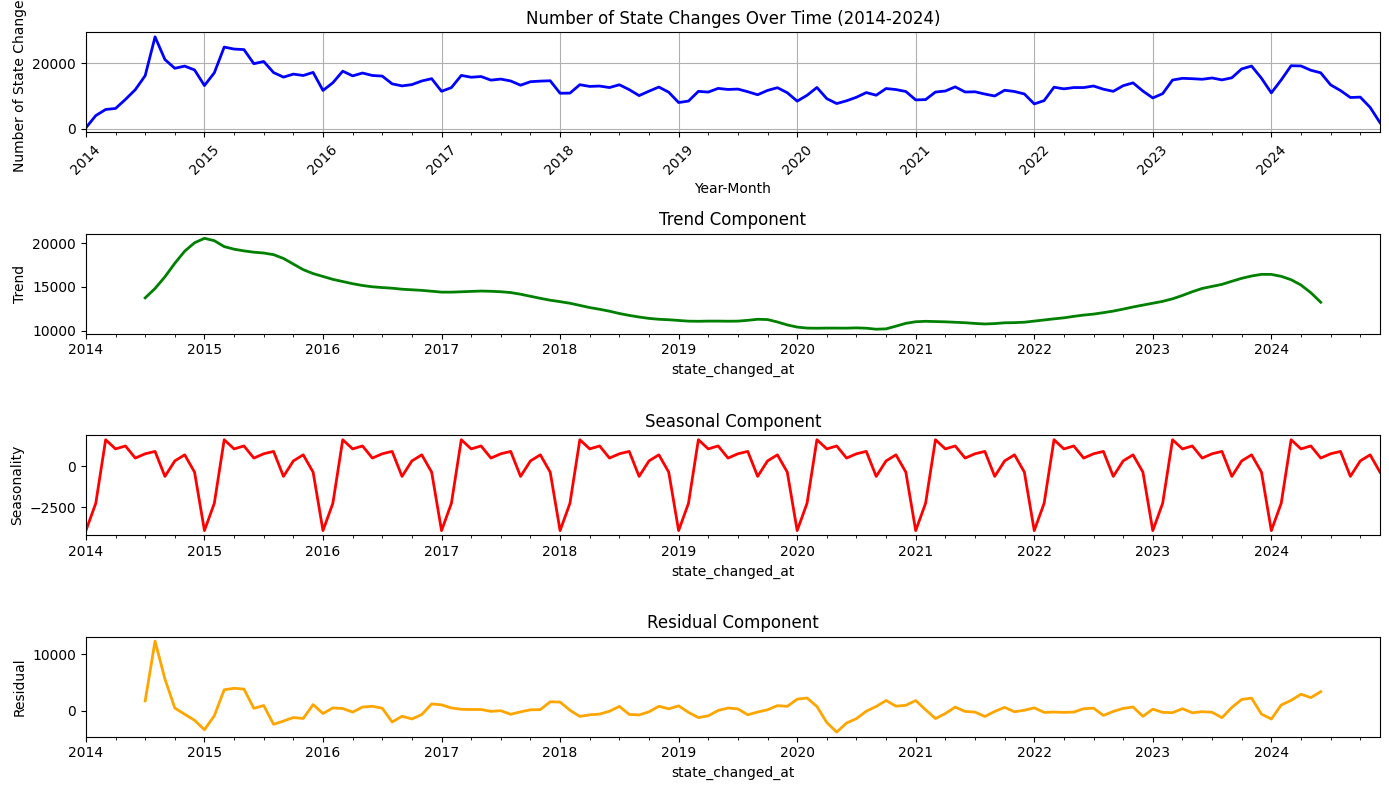

In [12]:

# Group by 'state_changed_at' to count the number of state changes per month
state_changes_per_month = df_filtered.groupby(df_filtered['state_changed_at'].dt.to_period('M')).size()

# Decompose the time series
state_changes_per_month = state_changes_per_month.asfreq('M')  # Ensure monthly frequency
decomposition = seasonal_decompose(state_changes_per_month, model='additive', period=12)  # Decompose with yearly period

# Plot the time series of state changes
plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
state_changes_per_month.plot(kind='line', color='b', linewidth=2)
plt.title("Number of State Changes Over Time (2014-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Number of State Changes")
plt.grid(True)
plt.xticks(rotation=45)

# Plot the decomposed components
plt.subplot(4, 1, 2)
decomposition.trend.plot(color='g', linewidth=2)
plt.title("Trend Component")
plt.ylabel("Trend")

plt.subplot(4, 1, 3)
decomposition.seasonal.plot(color='r', linewidth=2)
plt.title("Seasonal Component")
plt.ylabel("Seasonality")

plt.subplot(4, 1, 4)
decomposition.resid.plot(color='orange', linewidth=2)
plt.title("Residual Component")
plt.ylabel("Residual")

plt.tight_layout()
plt.show()



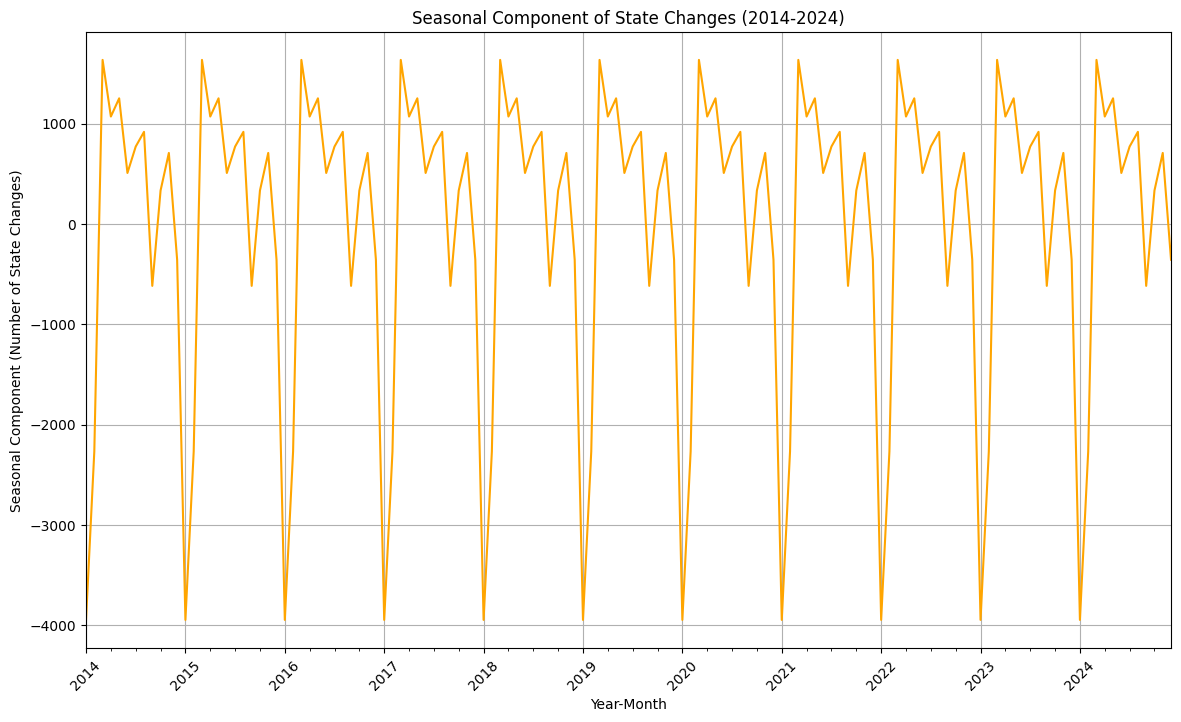

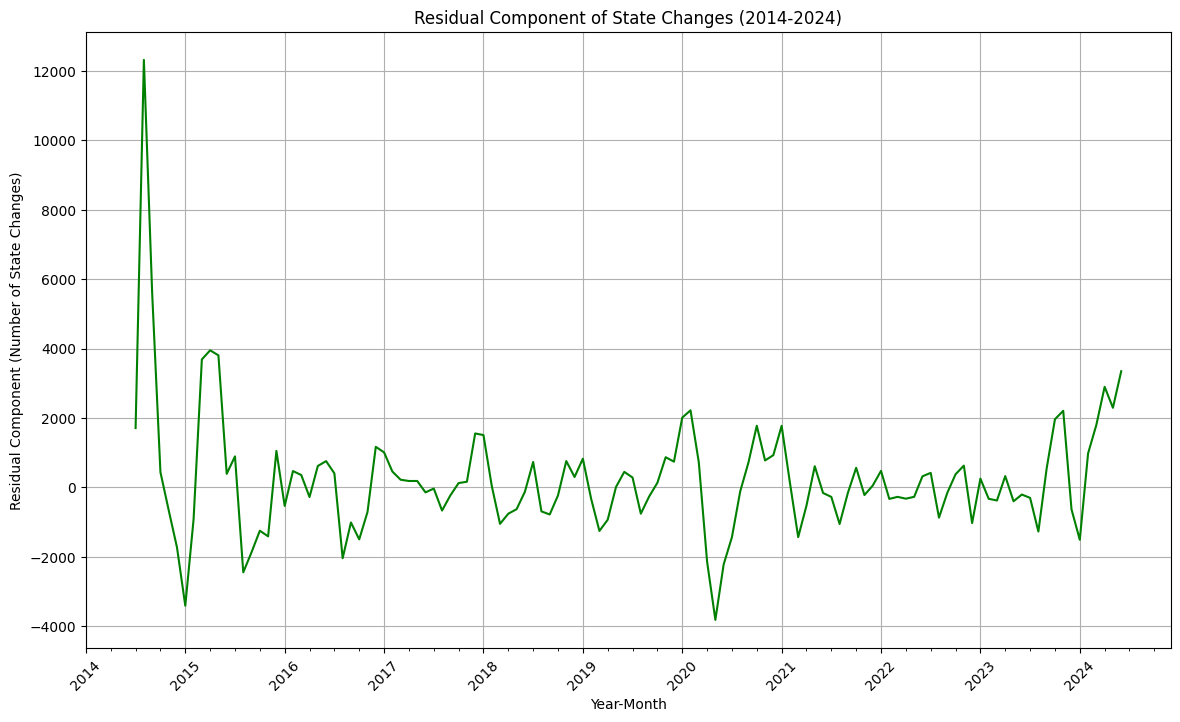

Residuals Summary Stats:
count      120.000000
mean       240.982986
std       1776.874940
min      -3814.317014
25%       -639.802431
50%         89.455903
75%        735.148611
max      12310.432986
Name: resid, dtype: float64


In [13]:
# Plot the seasonal component of the time series
plt.figure(figsize=(14, 8))
decomposition.seasonal.plot(color='orange')
plt.title("Seasonal Component of State Changes (2014-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Seasonal Component (Number of State Changes)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot the residuals (the noise or random variation after removing trend and seasonality)
plt.figure(figsize=(14, 8))
decomposition.resid.plot(color='green')
plt.title("Residual Component of State Changes (2014-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Residual Component (Number of State Changes)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Check for any significant residuals
print("Residuals Summary Stats:")
print(decomposition.resid.describe())


In [44]:
import numpy as np

# Calculate outliers (residuals more than 3 standard deviations from the mean)
mean_resid = decomposition.resid.mean()
std_resid = decomposition.resid.std()

outlier_threshold_upper = mean_resid + 3 * std_resid
outlier_threshold_lower = mean_resid - 3 * std_resid

outliers = decomposition.resid[(decomposition.resid > outlier_threshold_upper) | (decomposition.resid < outlier_threshold_lower)]

# Display the outliers
print("Outliers in residuals:")
print(outliers)


Outliers in residuals:
state_changed_at
2014-08    12310.432986
2014-09     5598.491319
Freq: M, Name: resid, dtype: float64


In [56]:
df_filtered_initial_ongoing.shape

(101815, 33)

In [14]:
df_filtered.shape

(1744006, 33)

Success rate: 0.00%


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/2222677491.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['months_to_final_state'] = (df_filtered['state_changed_at'] - df_filtered['launched_at']).dt.days/30


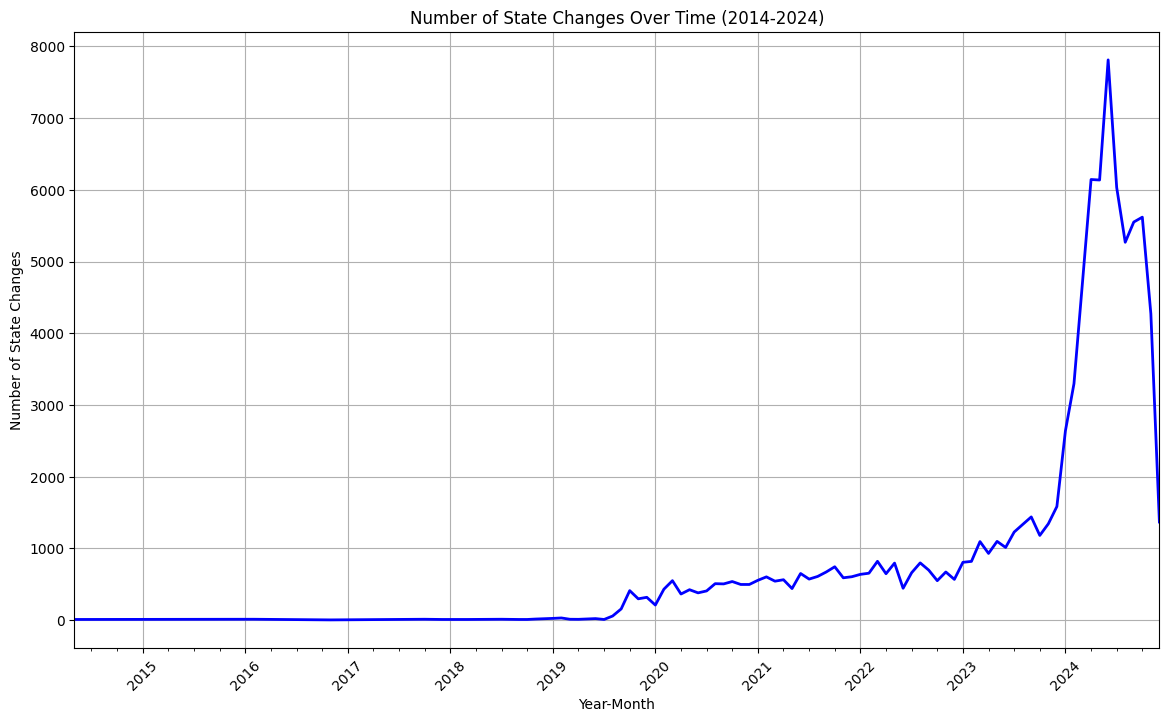

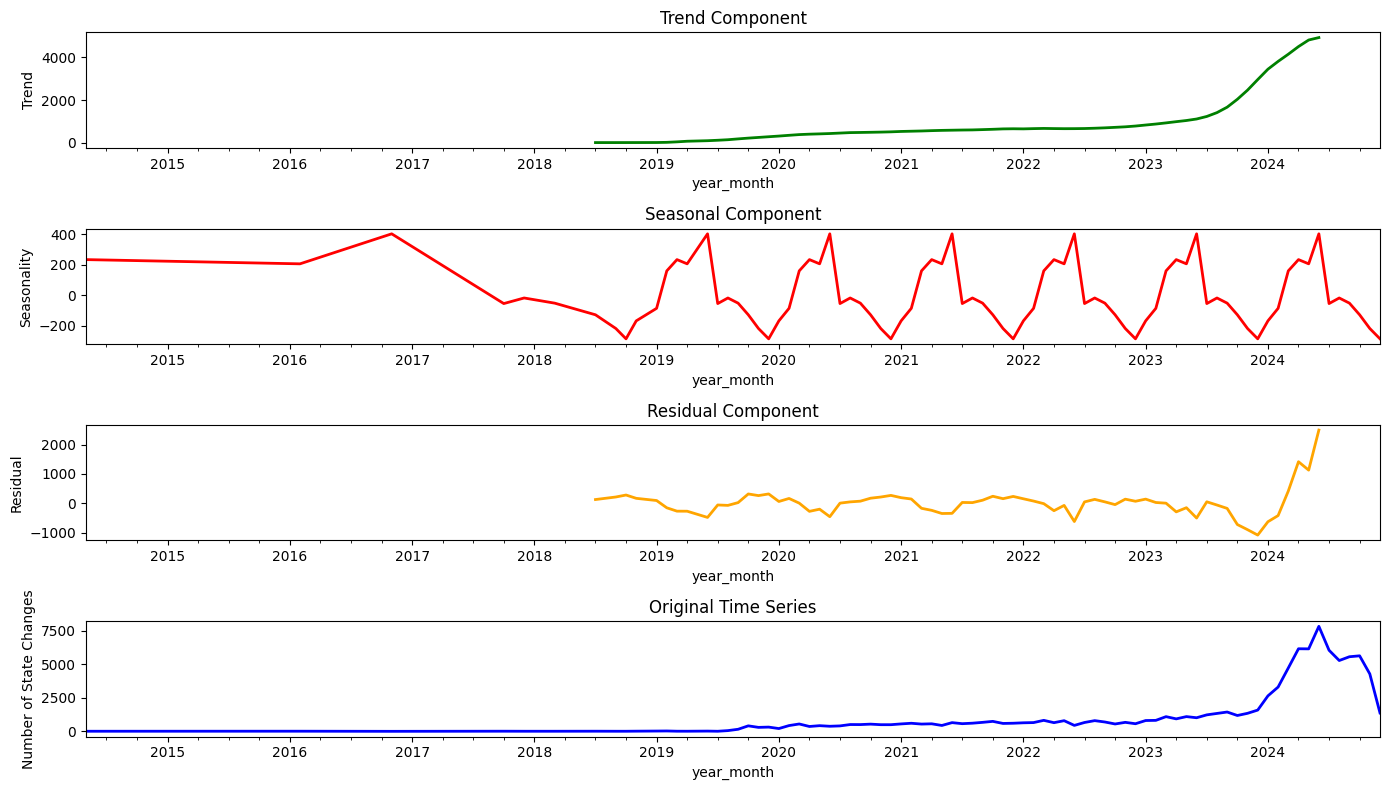

   backers_count                                              blurb  \
0              2       Astrological Connections and Personal Wisdom   
4              1  Cozy Kornerz is a fun new redecorating tool th...   
5              1  I want to design an exercise Matt with practic...   
6              0  A space engineered to promote informed consume...   
7              0  YourMD Online Connect: Redefining Telehealth f...   

   converted_pledged_amount country_displayable_name currency  \
0                      51.0        the United States      USD   
4                       1.0        the United States      USD   
5                       1.0        the United States      USD   
6                       NaN                Australia      AUD   
7                       NaN        the United States      USD   

  current_currency  disable_communication   fx_rate     goal          id  ...  \
0              USD                  False  1.000000  60000.0   890895296  ...   
4              USD  

In [113]:

# This following alteration to the dataset includes 


# Step 1: Convert 'launched_at' and 'state_changed_at' to datetime
df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s', errors='coerce')
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit='s', errors='coerce')

# Step 2: Create a 'year_month' column for easier time-based grouping
df['year_month'] = df['state_changed_at'].dt.to_period('M')

# Step 3: Remove rows where the first state is a final state (final states: 'successful', 'failed', 'canceled', etc.)
final_states = ['successful', 'failed', 'canceled', 'suspended']
df_filtered = df[~df['state'].isin(final_states)]

# Step 4: Calculate months to final state (only for rows where the campaign is not in a final state yet)
df_filtered['months_to_final_state'] = (df_filtered['state_changed_at'] - df_filtered['launched_at']).dt.days/30

# Step 5: Filter out invalid or unreasonable campaign durations (e.g., negative durations)
df_filtered = df_filtered[df_filtered['months_to_final_state'] >= 0]

# Step 6: Filter only campaigns from 2014 to 2024
df_filtered = df_filtered[df_filtered['year_month'].dt.year.between(2014, 2024)]

# Step 7: Calculate success rate for campaigns based on 'state'
df_successful = df_filtered[df_filtered['state'] == 'successful']
success_rate = len(df_successful) / len(df_filtered) * 100
print(f"Success rate: {success_rate:.2f}%")

# Step 8: Group by 'year_month' to count the number of state changes (non-final states)
state_changes_per_month = df_filtered.groupby(df_filtered['year_month'])['state'].count()

# Step 9: Plot the time series of state changes
plt.figure(figsize=(14, 8))
state_changes_per_month.plot(kind='line', color='b', linewidth=2)
plt.title("Number of State Changes Over Time (2014-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Number of State Changes")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Step 10: Decompose the time series for state changes
from statsmodels.tsa.seasonal import seasonal_decompose
state_changes_per_month = state_changes_per_month.asfreq('M')  # Ensure monthly frequency
decomposition = seasonal_decompose(state_changes_per_month, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(14, 8))

# Trend component
plt.subplot(4, 1, 1)
decomposition.trend.plot(color='g', linewidth=2)
plt.title("Trend Component")
plt.ylabel("Trend")

# Seasonal component
plt.subplot(4, 1, 2)
decomposition.seasonal.plot(color='r', linewidth=2)
plt.title("Seasonal Component")
plt.ylabel("Seasonality")

# Residual component
plt.subplot(4, 1, 3)
decomposition.resid.plot(color='orange', linewidth=2)
plt.title("Residual Component")
plt.ylabel("Residual")

# Original time series
plt.subplot(4, 1, 4)
state_changes_per_month.plot(color='b', linewidth=2)
plt.title("Original Time Series")
plt.ylabel("Number of State Changes")

plt.tight_layout()
plt.show()

# Step 11: Final clean DataFrame to work with
df_clean = df_filtered.dropna(subset=['months_to_final_state', 'year_month'])  # Clean DataFrame without missing values
print(df_clean.head())

# Optional: Save the cleaned data to a new CSV for further analysis
# df_clean.to_csv('cleaned_data.csv', index=False)


In [87]:
df_clean[df_clean['id']==890895296].state

0       live
5587    live
Name: state, dtype: object

In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94570 entries, 0 to 1962437
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   backers_count                       94570 non-null  int64         
 1   blurb                               94547 non-null  object        
 2   converted_pledged_amount            33675 non-null  float64       
 3   country_displayable_name            94570 non-null  object        
 4   currency                            94570 non-null  object        
 5   current_currency                    94570 non-null  object        
 6   disable_communication               94570 non-null  bool          
 7   fx_rate                             94570 non-null  float64       
 8   goal                                94570 non-null  float64       
 9   id                                  94570 non-null  int64         
 10  is_disliked              

Campaign State Distribution:
state
submitted    57714
live         33675
started       3181
Name: count, dtype: int64


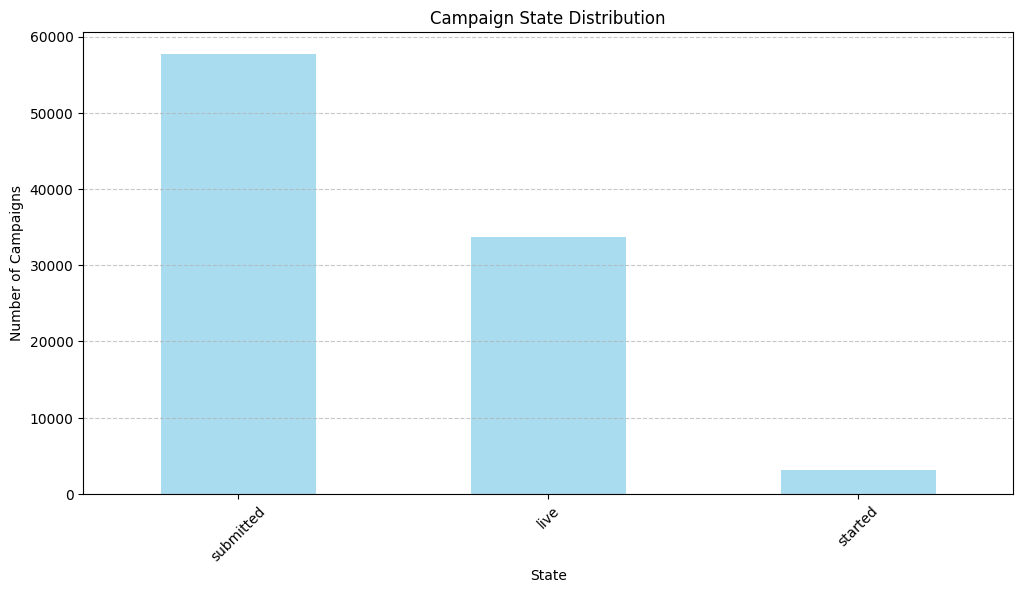

In [89]:
# Distribution of campaign states
state_distribution = df_clean['state'].value_counts()
print("Campaign State Distribution:")
print(state_distribution)

# Plot the distribution of states
plt.figure(figsize=(12, 6))
state_distribution.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Campaign State Distribution')
plt.xlabel('State')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


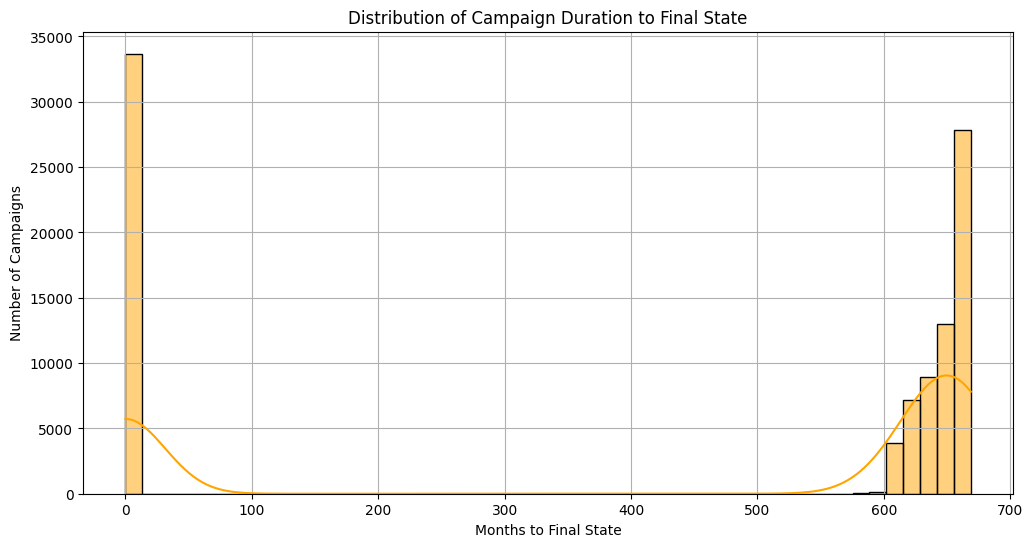

Campaign Duration to Final State Summary:
count    94570.000000
mean       416.862509
std        310.310868
min          0.000000
25%          0.000000
50%        632.533333
75%        658.333333
max        668.966667
Name: months_to_final_state, dtype: float64


In [114]:
# Distribution of campaign durations (months to final state)
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['months_to_final_state'], bins=50, kde=True, color='orange')
plt.title('Distribution of Campaign Duration to Final State')
plt.xlabel('Months to Final State')
plt.ylabel('Number of Campaigns')
plt.grid(True)
plt.show()

# Summary statistics of campaign durations
print("Campaign Duration to Final State Summary:")
print(df_clean['months_to_final_state'].describe())


📊 Campaign Duration to Final State Summary:
count    94570.000000
mean       416.862509
std        310.310868
min          0.000000
25%          0.000000
50%        632.533333
75%        658.333333
max        668.966667
Name: months_to_final_state, dtype: float64


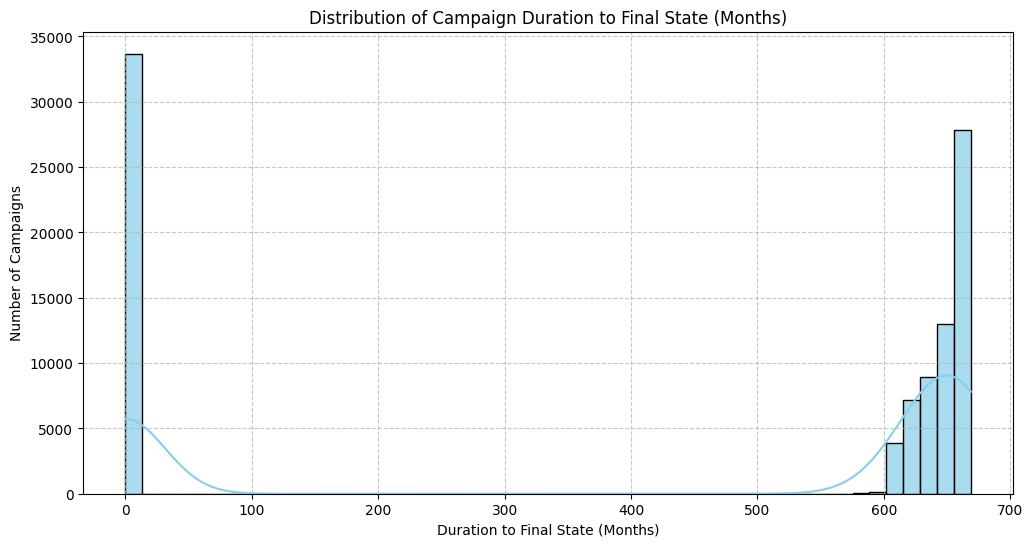

In [94]:
# Summary statistics for campaign duration to final state
campaign_duration_summary = df_clean['months_to_final_state'].describe()

# Display summary statistics
print("📊 Campaign Duration to Final State Summary:")
print(campaign_duration_summary)

# Plot the distribution of campaign durations to final state (in months)
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['months_to_final_state'], bins=50, kde=True, color='skyblue', alpha=0.7)
plt.title("Distribution of Campaign Duration to Final State (Months)")
plt.xlabel("Duration to Final State (Months)")
plt.ylabel("Number of Campaigns")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


📊 Campaign Duration to Final State (Excluding Zeros) Summary:
count    60895.000000
mean       647.387922
std         17.376170
min        540.633333
25%        635.066667
50%        653.600000
75%        661.433333
max        668.966667
Name: months_to_final_state, dtype: float64


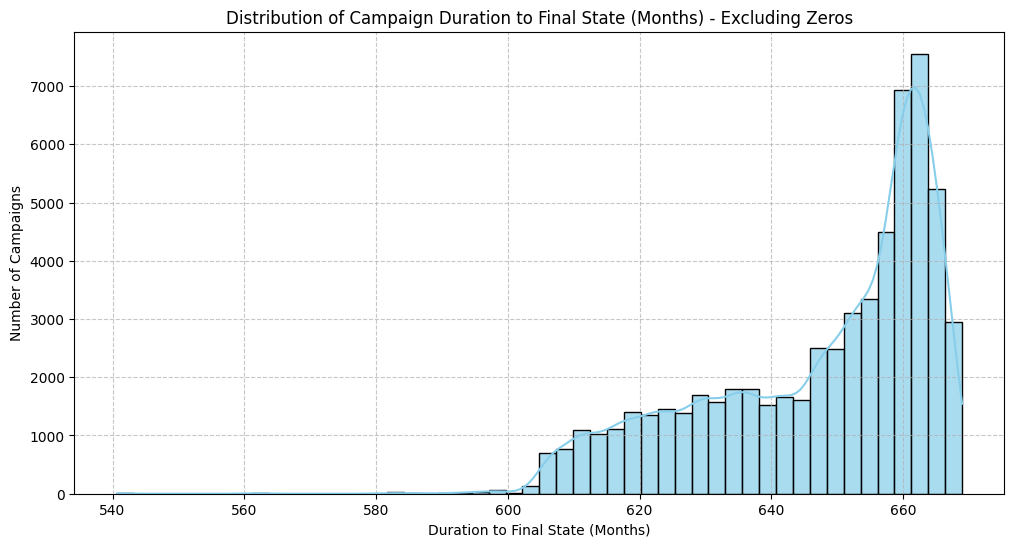

In [95]:
# Filter out campaigns with zero duration to final state
df_clean_filtered = df_clean[df_clean['months_to_final_state'] > 0]

# Summary statistics for campaign duration to final state (excluding zeros)
campaign_duration_summary = df_clean_filtered['months_to_final_state'].describe()

# Display summary statistics
print("📊 Campaign Duration to Final State (Excluding Zeros) Summary:")
print(campaign_duration_summary)

# Plot the distribution of campaign durations to final state (in months), excluding zero values
plt.figure(figsize=(12, 6))
sns.histplot(df_clean_filtered['months_to_final_state'], bins=50, kde=True, color='skyblue', alpha=0.7)
plt.title("Distribution of Campaign Duration to Final State (Months) - Excluding Zeros")
plt.xlabel("Duration to Final State (Months)")
plt.ylabel("Number of Campaigns")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [97]:
# Set a threshold for maximum realistic duration (e.g., 60 months = 5 years)
max_duration_threshold = 60  # You can adjust this as necessary

# Filter out the rows with unrealistic campaign durations
df_filtered_valid = df_clean[df_clean['months_to_final_state'] <= max_duration_threshold]

# Check the rows that were filtered out
abnormal_durations = df_clean[df_clean['months_to_final_state'] > max_duration_threshold]
print(abnormal_durations[['id', 'months_to_final_state']].count)


<bound method DataFrame.count of                  id  months_to_final_state
6         571448873             656.700000
7         426428160             650.033333
8         899640089             639.266667
9        1004462942             629.666667
10        589375458             620.833333
...             ...                    ...
1962289   206404502             662.800000
1962305   809813025             668.033333
1962308   838276220             667.333333
1962309  1226708214             665.200000
1962437  1733685235             649.533333

[60895 rows x 2 columns]>


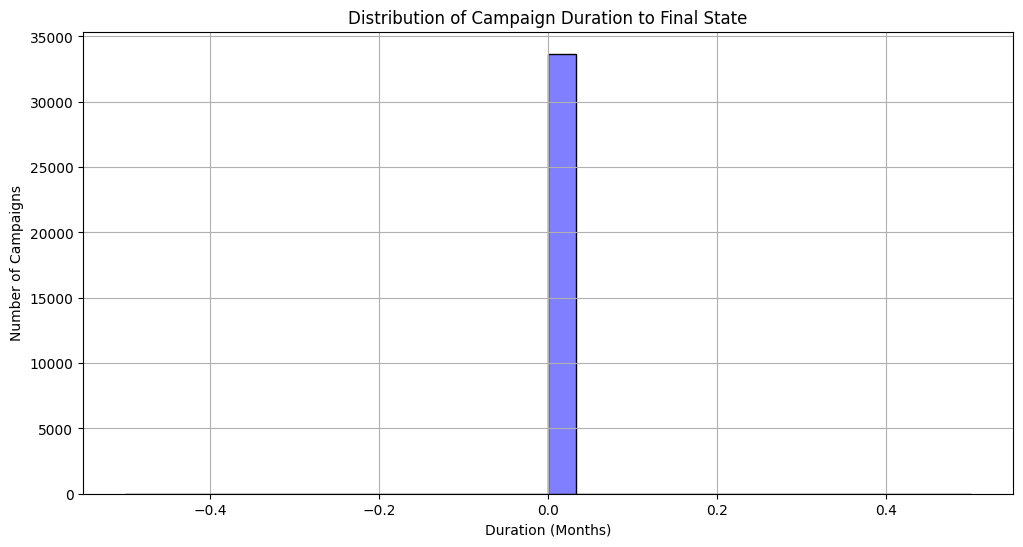

In [98]:
# Plot the distribution of campaign durations
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered_valid['months_to_final_state'], bins=30, kde=True, color='blue')
plt.title("Distribution of Campaign Duration to Final State")
plt.xlabel("Duration (Months)")
plt.ylabel("Number of Campaigns")
plt.grid(True)
plt.show()


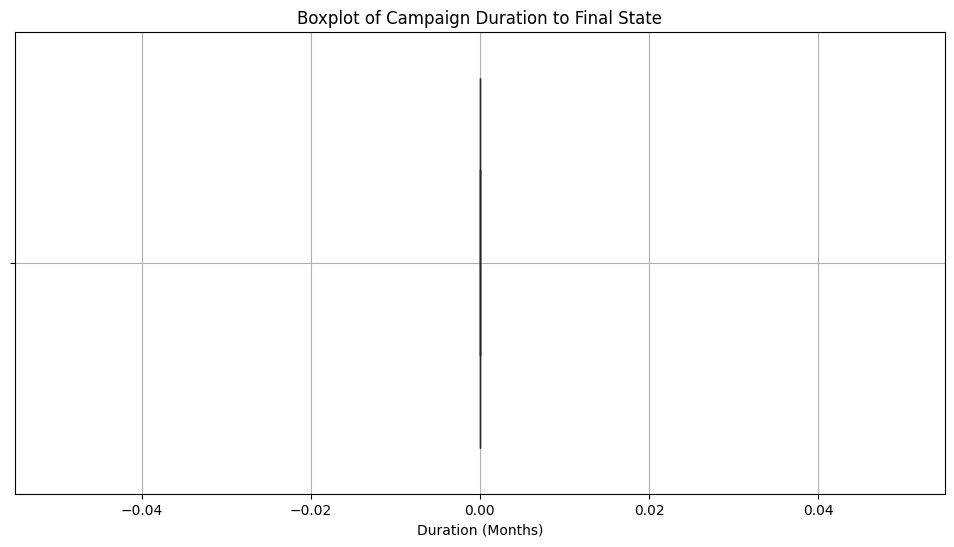

In [99]:
# Plot a boxplot to visualize potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered_valid['months_to_final_state'], color='green')
plt.title("Boxplot of Campaign Duration to Final State")
plt.xlabel("Duration (Months)")
plt.grid(True)
plt.show()


Top 20 Campaign Categories:
category_name
Games           34692
Publishing      12081
Design           9292
Technology       8010
Comics           6708
Film & Video     5534
Art              4184
Fashion          3057
Food             2937
Music            2545
Crafts            886
Photography       605
Journalism        486
Theater           457
Dance              91
Name: count, dtype: int64


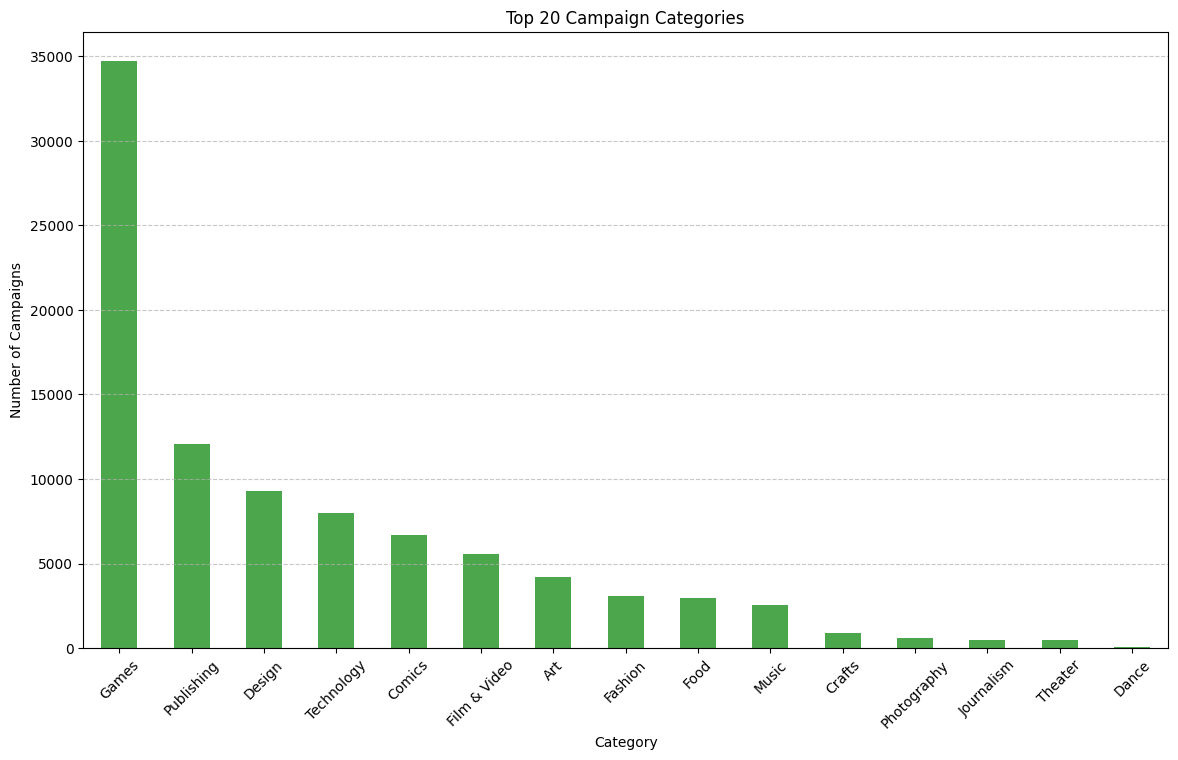

In [91]:
# Distribution of campaigns by category
category_distribution = df_clean['category_name'].value_counts().head(20)  # Top 20 categories
print("Top 20 Campaign Categories:")
print(category_distribution)

# Plot the distribution of campaigns by category
plt.figure(figsize=(14, 8))
category_distribution.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 20 Campaign Categories')
plt.xlabel('Category')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


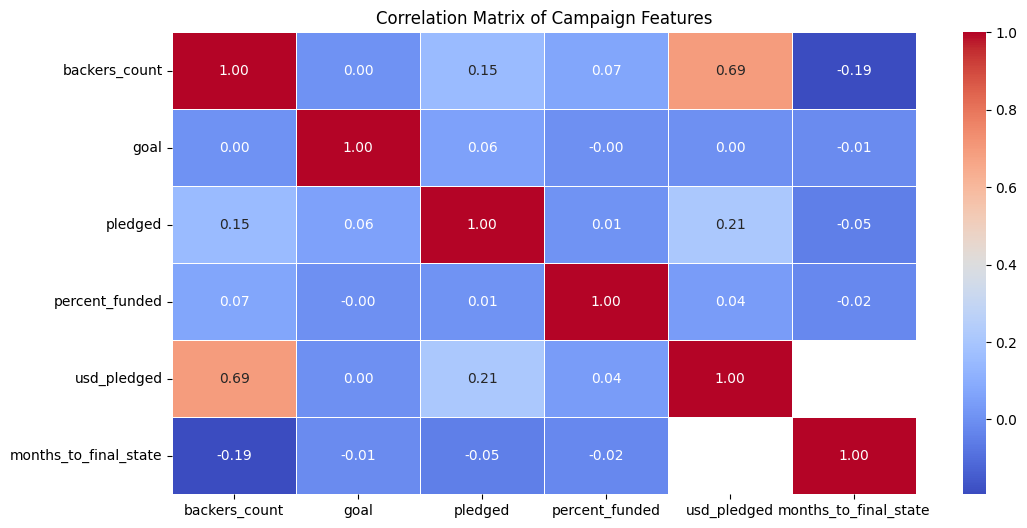

Correlation Matrix:
                       backers_count      goal   pledged  percent_funded  \
backers_count               1.000000  0.002833  0.149589        0.070498   
goal                        0.002833  1.000000  0.055750       -0.000113   
pledged                     0.149589  0.055750  1.000000        0.008758   
percent_funded              0.070498 -0.000113  0.008758        1.000000   
usd_pledged                 0.694628  0.002568  0.209900        0.038480   
months_to_final_state      -0.192902 -0.013032 -0.050930       -0.022513   

                       usd_pledged  months_to_final_state  
backers_count             0.694628              -0.192902  
goal                      0.002568              -0.013032  
pledged                   0.209900              -0.050930  
percent_funded            0.038480              -0.022513  
usd_pledged               1.000000                    NaN  
months_to_final_state          NaN               1.000000  


In [92]:
# Select numerical columns for correlation analysis
numeric_cols = ['backers_count', 'goal', 'pledged', 'percent_funded', 'usd_pledged', 'months_to_final_state']

# Calculate correlation matrix
corr_matrix = df_clean[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Campaign Features")
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


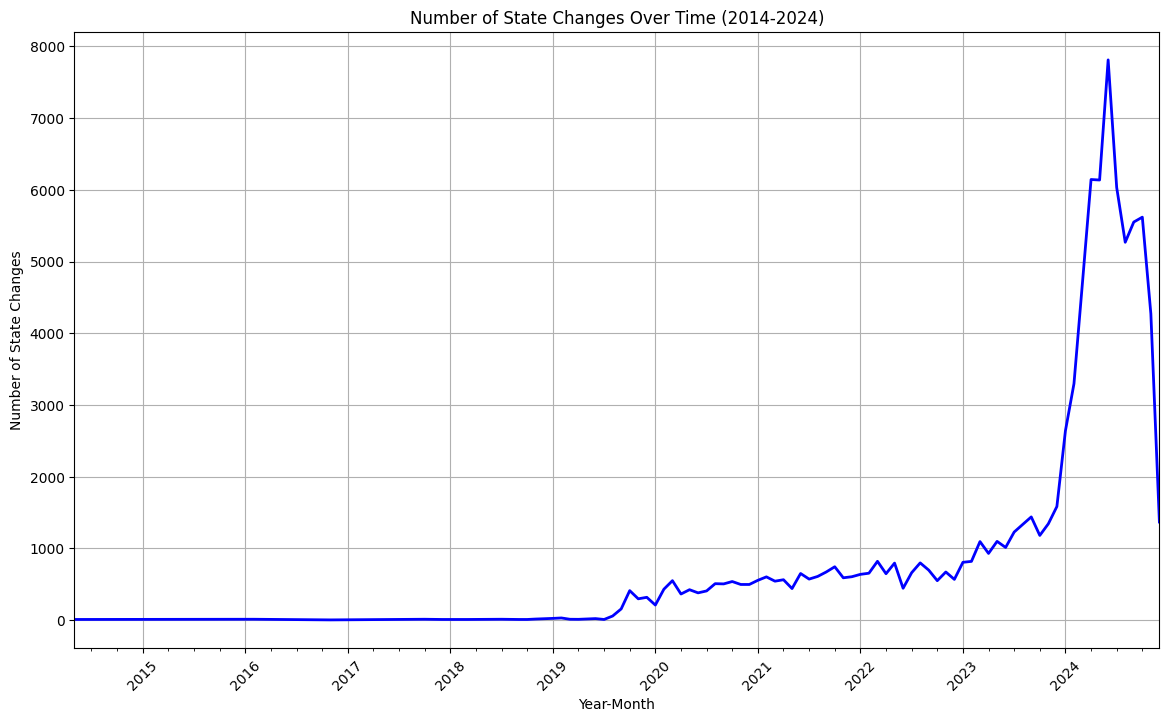

State Changes per Month:
state_changed_at
2014-05     9
2016-02    12
2016-11     3
2017-10    12
2017-12     9
Freq: M, dtype: int64


In [93]:
# Group by 'state_changed_at' to count the number of state changes per month
state_changes_per_month = df_clean.groupby(df_clean['state_changed_at'].dt.to_period('M')).size()

# Plot the time series of state changes
plt.figure(figsize=(14, 8))
state_changes_per_month.plot(kind='line', color='b', linewidth=2)
plt.title("Number of State Changes Over Time (2014-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Number of State Changes")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Display the number of state changes per month
print("State Changes per Month:")
print(state_changes_per_month.head())


Campaign Duration to Final State (Excluding Zeros) Summary:
count    60895.000000
mean       647.387922
std         17.376170
min        540.633333
25%        635.066667
50%        653.600000
75%        661.433333
max        668.966667
Name: months_to_final_state, dtype: float64


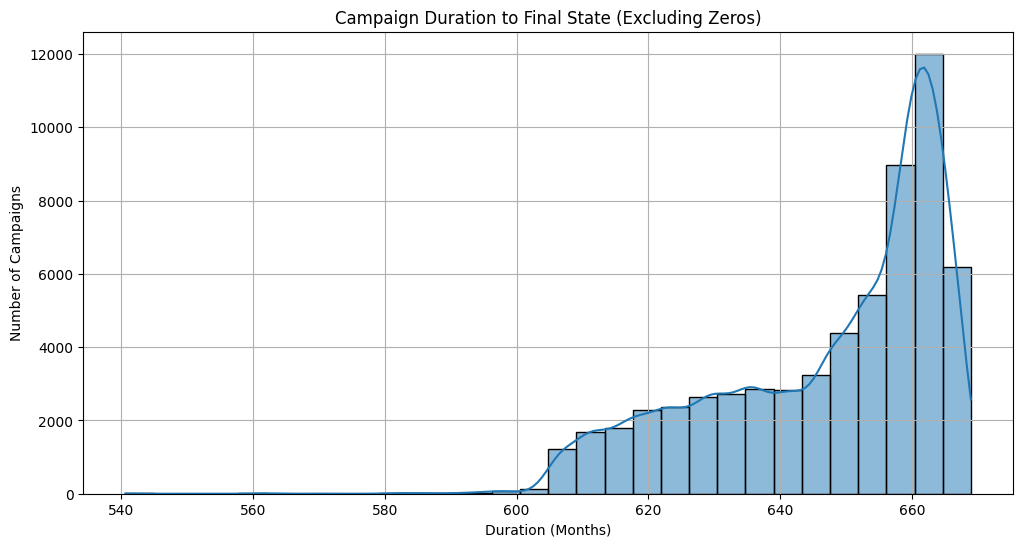

In [102]:
# Assuming the 'months_to_final_state' column already contains the correct month difference
df_clean = df_clean[df_clean['months_to_final_state'] > 0]  # Filter out zero values

# Summary of campaign duration excluding zeros
campaign_duration_summary = df_clean['months_to_final_state'].describe()

# Display summary
print("Campaign Duration to Final State (Excluding Zeros) Summary:")
print(campaign_duration_summary)

# Optionally, plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['months_to_final_state'], bins=30, kde=True)
plt.title("Campaign Duration to Final State (Excluding Zeros)")
plt.xlabel("Duration (Months)")
plt.ylabel("Number of Campaigns")
plt.grid(True)
plt.show()


In [116]:
df_clean.shape

(94570, 35)

In [117]:
df_clean.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'months_to_final_state'],
      dtype='object')

In [138]:
sub = ["month","months_to_final_state","year_month",'year_months_final']

In [136]:
df_clean[sub]

KeyError: "['year_month_final'] not in index"

In [143]:
df_clean['state_changed_at']

0         2024-01-13 00:16:51
4         2024-01-12 21:16:08
5         2024-01-10 21:36:47
6         2023-12-10 15:21:10
7         2023-05-24 02:04:52
                  ...        
1962308   2024-10-24 05:20:31
1962309   2024-08-21 02:27:29
1962424   2024-12-08 03:48:44
1962430   2024-11-14 13:43:56
1962437   2023-05-09 20:16:11
Name: state_changed_at, Length: 94570, dtype: datetime64[ns]

In [145]:
 df_clean['launched_at']

0         2024-01-13 00:16:49
4         2024-01-12 21:16:05
5         2024-01-10 21:36:44
6         1970-01-01 00:00:00
7         1970-01-01 00:00:00
                  ...        
1962308   1970-01-01 00:00:00
1962309   1970-01-01 00:00:00
1962424   2024-12-08 03:48:42
1962430   2024-11-14 13:43:54
1962437   1970-01-01 00:00:00
Name: launched_at, Length: 94570, dtype: datetime64[ns]

count    33675.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: months_to_final_state, dtype: float64


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/3144514277.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['days_to_final_state'] = (df_cleaned['state_changed_at'] - df_cleaned['launched_at']).dt.days
/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/3144514277.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['months_to_final_state'] = df_cleaned['days_to_final_state'] / 30


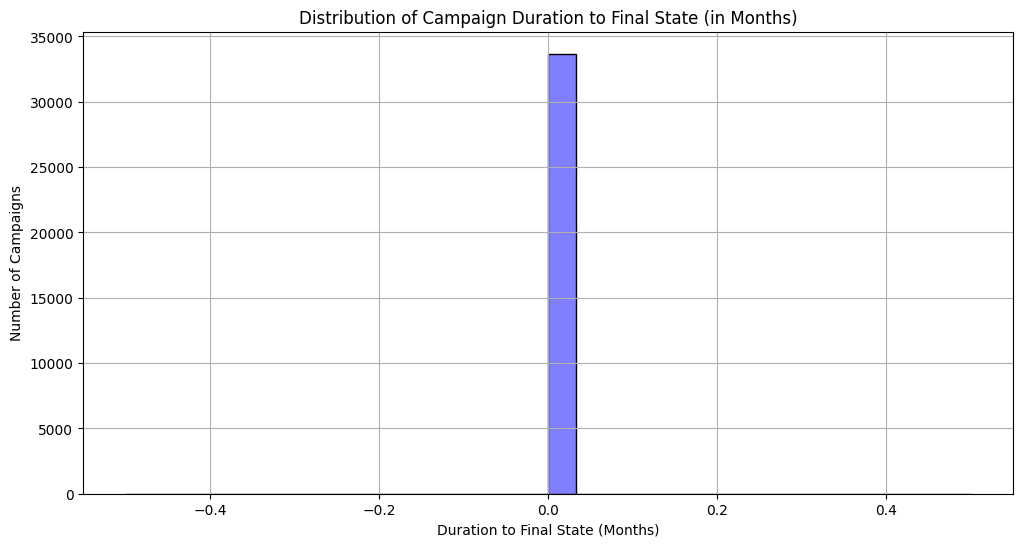

In [146]:
# Step 1: Clean the 'launched_at' column by filtering out rows with invalid dates
df_cleaned = df_clean[df_clean['launched_at'] != pd.Timestamp('1970-01-01')]

# Step 2: Calculate months to final state as the difference between 'state_changed_at' and 'launched_at'
# Calculate the difference in days first
df_cleaned['days_to_final_state'] = (df_cleaned['state_changed_at'] - df_cleaned['launched_at']).dt.days

# Convert days to months (approximately assuming 30 days in a month)
df_cleaned['months_to_final_state'] = df_cleaned['days_to_final_state'] / 30

# Filter out rows where the 'months_to_final_state' is negative or invalid (if necessary)
df_cleaned = df_cleaned[df_cleaned['months_to_final_state'] >= 0]

# Step 3: Summary Statistics
summary_stats = df_cleaned['months_to_final_state'].describe()
print(summary_stats)

# Step 4: Plot the distribution of campaign duration to final state (in months)
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['months_to_final_state'], bins=30, kde=True, color='blue')
plt.title("Distribution of Campaign Duration to Final State (in Months)")
plt.xlabel("Duration to Final State (Months)")
plt.ylabel("Number of Campaigns")
plt.grid(True)
plt.show()


In [158]:
df_clean[['id','months_to_final_state']]

,id,months_to_final_state
0,890895296,0.000000
4,1779862446,0.000000
5,2018200107,0.000000
6,571448873,656.700000
7,426428160,650.033333
...,...,...
1962308,838276220,667.333333
1962309,1226708214,665.200000
1962424,276115866,0.000000
1962430,1168899652,0.000000


In [169]:
df_cleaned[['id','months_to_final_state']]

,id,months_to_final_state
0,890895296,0.0
4,1779862446,0.0
5,2018200107,0.0
50,167210890,0.0
51,269071165,0.0
...,...,...
1962219,1511744697,0.0
1962281,1174125206,0.0
1962298,1625473329,0.0
1962424,276115866,0.0


In [170]:
df_cleaned['months_to_final_state']

0.0

In [171]:
df_cleaned.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'months_to_final_state', 'days_to_final_state'],
      dtype='object')

In [172]:
df_cleaned['launched_at']

0         2024-01-13 00:16:49
4         2024-01-12 21:16:05
5         2024-01-10 21:36:44
50        2024-01-05 18:00:36
51        2024-01-02 04:00:41
                  ...        
1962219   2024-12-09 19:51:36
1962281   2024-12-01 12:49:19
1962298   2024-11-19 13:30:04
1962424   2024-12-08 03:48:42
1962430   2024-11-14 13:43:54
Name: launched_at, Length: 33675, dtype: datetime64[ns]

In [187]:
df_cleaned[['state_changed_at','launched_at','month','state']]

,state_changed_at,launched_at,month,state
0,2024-01-13 00:16:51,2024-01-13 00:16:49,2024-01-01,live
4,2024-01-12 21:16:08,2024-01-12 21:16:05,2024-01-01,live
5,2024-01-10 21:36:47,2024-01-10 21:36:44,2024-01-01,live
50,2024-01-05 18:00:39,2024-01-05 18:00:36,2024-01-01,live
51,2024-01-02 04:00:44,2024-01-02 04:00:41,2024-01-01,live
...,...,...,...,...
1962219,2024-12-09 19:51:38,2024-12-09 19:51:36,2024-12-01,live
1962281,2024-12-01 12:49:21,2024-12-01 12:49:19,2024-12-01,live
1962298,2024-11-19 13:30:07,2024-11-19 13:30:04,2024-12-01,live
1962424,2024-12-08 03:48:44,2024-12-08 03:48:42,2024-12-01,live


In [189]:
df_cleaned.state.value_counts()

state
live    33675
Name: count, dtype: int64

In [190]:
df_clean.state.value_counts()

state
submitted    57714
live         33675
started       3181
Name: count, dtype: int64

In [16]:


# Assuming df is your current cleaned dataframe

# Step 1: Filter out campaigns where the first state is a final state or 'live'
final_states = ['successful', 'failed', 'canceled', 'suspended']
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit='s')
df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')

# Sort by id and state_changed_at to ensure correct order
df = df.sort_values(by=['id', 'state_changed_at'])

# Filter to only include campaigns that began with 'live' or 'ongoing' states, and exclude campaigns that started with final states
df = df[~df.groupby('id')['state'].transform('first').isin(final_states)]

# Step 2: Calculate the time in months to reach a final state
# Filter campaigns that have reached a final state
df_final_states = df[df['state'].isin(final_states)]

# Merge back with the original dataframe to get the first state for each campaign
df_first_state = df.groupby('id').first().reset_index()

# Merge final states with first state to calculate time to final state
df_final_states = pd.merge(df_final_states, df_first_state[['id', 'state_changed_at']], on='id', how='left', suffixes=('', '_first'))

# Calculate the time to final state in months
df_final_states['months_to_final_state'] = (df_final_states['state_changed_at'] - df_final_states['state_changed_at_first']).dt.days / 30

# Step 3: Now we can proceed with the analysis and visualization
# Display the campaigns that have successfully transitioned to a final state and how long it took them to get there.
print(df_final_states[['id', 'state', 'months_to_final_state']].head())

# You can now plot the time to final state or analyze it further


      id       state  months_to_final_state
0  13583  successful                    0.0
1  13583  successful                    0.0
2  19685  successful                    0.0
3  19685  successful                    0.0
4  19685  successful                    0.0


In [195]:
df_final_states.state.value_counts()

state
successful    55757
failed        16544
canceled       1288
suspended        14
Name: count, dtype: int64

In [198]:
df_final_states[df_final_states['id']==19685].state

2    successful
3    successful
4    successful
5    successful
6    successful
7    successful
Name: state, dtype: object

## Model Dataset ##
The following iteration of the data is the one I use for the model. The logic of this dataset is slighly different than previous ones. I concluded that the campaigns that began with an ongoing state 'live' could remain in the dataset and we will determine the time it took for them to reach a final state. This does not take into consideration the fact that these campaigns had going for some time and the tracking of their changes will not give us insight as to how long the campaigns take, and might even skew the data in that respect but it will still give us information as to the level of acitivity as well as the rate of success and failure of different categories and subcategories.

In [18]:


# Step 1: Convert 'state_changed_at' and 'launched_at' to datetime format if not already
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], errors='coerce')
df['launched_at'] = pd.to_datetime(df['launched_at'], errors='coerce')

# Step 2: Filter out rows where 'launched_at' or 'state_changed_at' is from 1970
df_filtered = df[~df['state_changed_at'].dt.year.isin([1970])]
df_filtered = df_filtered[~df['launched_at'].dt.year.isin([1970])]

# Step 3: Ensure 'state_changed_at' is after 'launched_at'
df_filtered = df_filtered[df_filtered['state_changed_at'] >= df_filtered['launched_at']]

# Step 4: Identify the first state of each campaign
final_states = ['successful', 'failed', 'canceled', 'suspended']  # List of final states
df_filtered['first_state'] = df_filtered.groupby('id')['state_changed_at'].transform('min')

# Find the first state for each campaign
df_filtered['first_state'] = df_filtered.apply(
    lambda row: df_filtered[(df_filtered['id'] == row['id']) & (df_filtered['state_changed_at'] == row['first_state'])]['state'].values[0], axis=1)

# Step 5: Filter out campaigns that started with a final state
df_final_states = df_filtered[~df_filtered['first_state'].isin(final_states)]

# Step 6: Calculate months to final state for each campaign
df_final_states['months_to_final_state'] = (df_final_states['state_changed_at'] - df_final_states['launched_at']).dt.days / 30

# Step 7: Filter out campaigns with negative or zero duration
df_final_states = df_final_states[df_final_states['months_to_final_state'] > 0]

# Step 8: Remove duplicate entries after a final state has been reached
# Once a campaign reaches a final state, it should no longer appear in future months.
df_final_states_cleaned = df_final_states.drop_duplicates(subset=['id'], keep='first')

# Step 9: Display final cleaned dataset
print(df_final_states_cleaned.head())

# Optionally, you can perform further analysis such as summary statistics
print(df_final_states_cleaned['months_to_final_state'].describe())


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2222/4054278437.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~df['launched_at'].dt.year.isin([1970])]


ValueError: Columns must be same length as key

In [201]:
df_final_states_cleaned.shape

(15055, 35)

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/2974932377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_states_cleaned['state_changed_at'] = pd.to_datetime(df_final_states_cleaned['state_changed_at'])


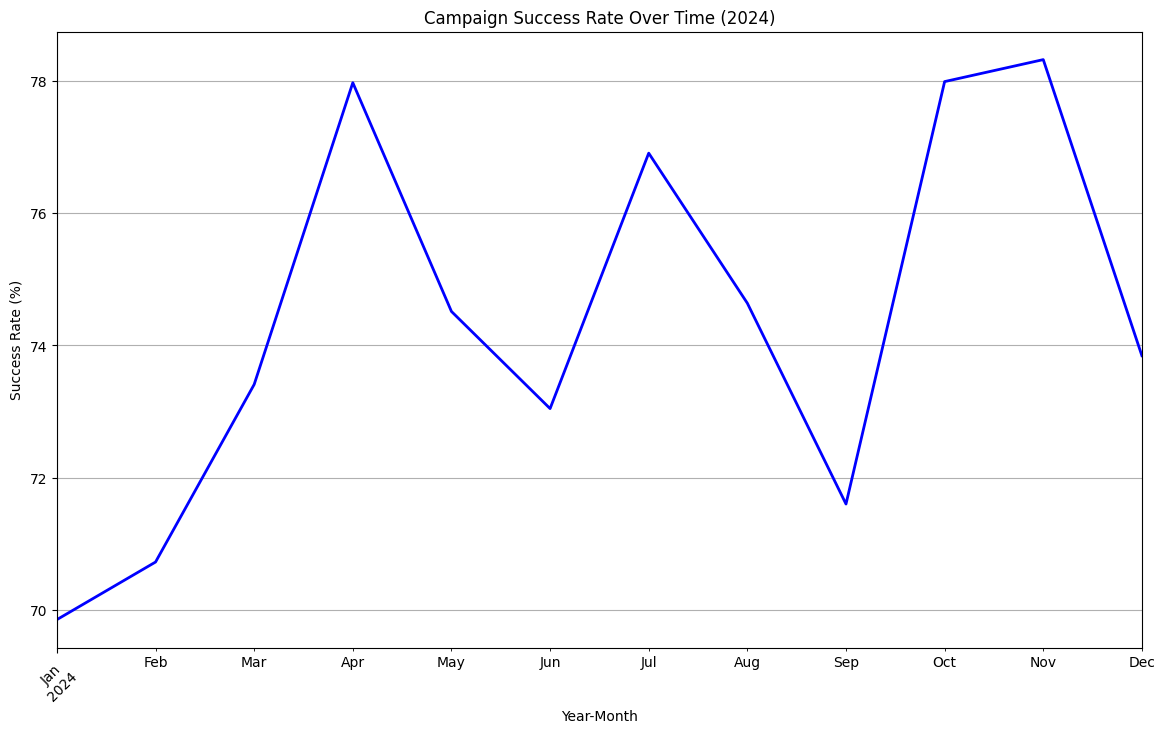

📊 Campaign Success Rate Over Time:
state_changed_at
2024-01    69.852941
2024-02    70.723684
2024-03    73.409091
2024-04    77.971737
2024-05    74.512902
2024-06    73.044050
2024-07    76.906552
2024-08    74.637261
2024-09    71.601017
2024-10    77.988712
2024-11    78.320935
2024-12    73.843416
Freq: M, dtype: float64


In [205]:
# Ensure the 'state_changed_at' column is in datetime format
df_final_states_cleaned['state_changed_at'] = pd.to_datetime(df_final_states_cleaned['state_changed_at'])

# Filter only successful campaigns
successful_campaigns = df_final_states_cleaned[df_final_states_cleaned['state'] == 'successful']

# Group by month or year to calculate the success rate over time
success_rate_by_month = successful_campaigns.groupby(successful_campaigns['state_changed_at'].dt.to_period('M')).size() / df_final_states_cleaned.groupby(df_final_states_cleaned['state_changed_at'].dt.to_period('M')).size() * 100

# Plot the success rate trend
plt.figure(figsize=(14, 8))
success_rate_by_month.plot(kind='line', color='b', linewidth=2)
plt.title("Campaign Success Rate Over Time (2024)")
plt.xlabel("Year-Month")
plt.ylabel("Success Rate (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Display the success rate by month
print("📊 Campaign Success Rate Over Time:")
print(success_rate_by_month)


1721446   2024-09-04 13:59:04
689207    2024-05-14 17:31:01
1189435   2024-07-19 13:00:52
64117     2024-01-16 16:55:53
471804    2024-03-29 18:23:55
                  ...        
1002012   2024-06-11 16:22:41
1643836   2024-10-01 18:05:02
521270    2024-05-04 00:13:40
507648    2024-05-06 17:43:21
1551599   2024-10-11 14:00:24
Name: launched_at, Length: 15055, dtype: datetime64[ns]

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/162595003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration_by_category, x='category_name', y='months_to_final_state', palette='viridis')


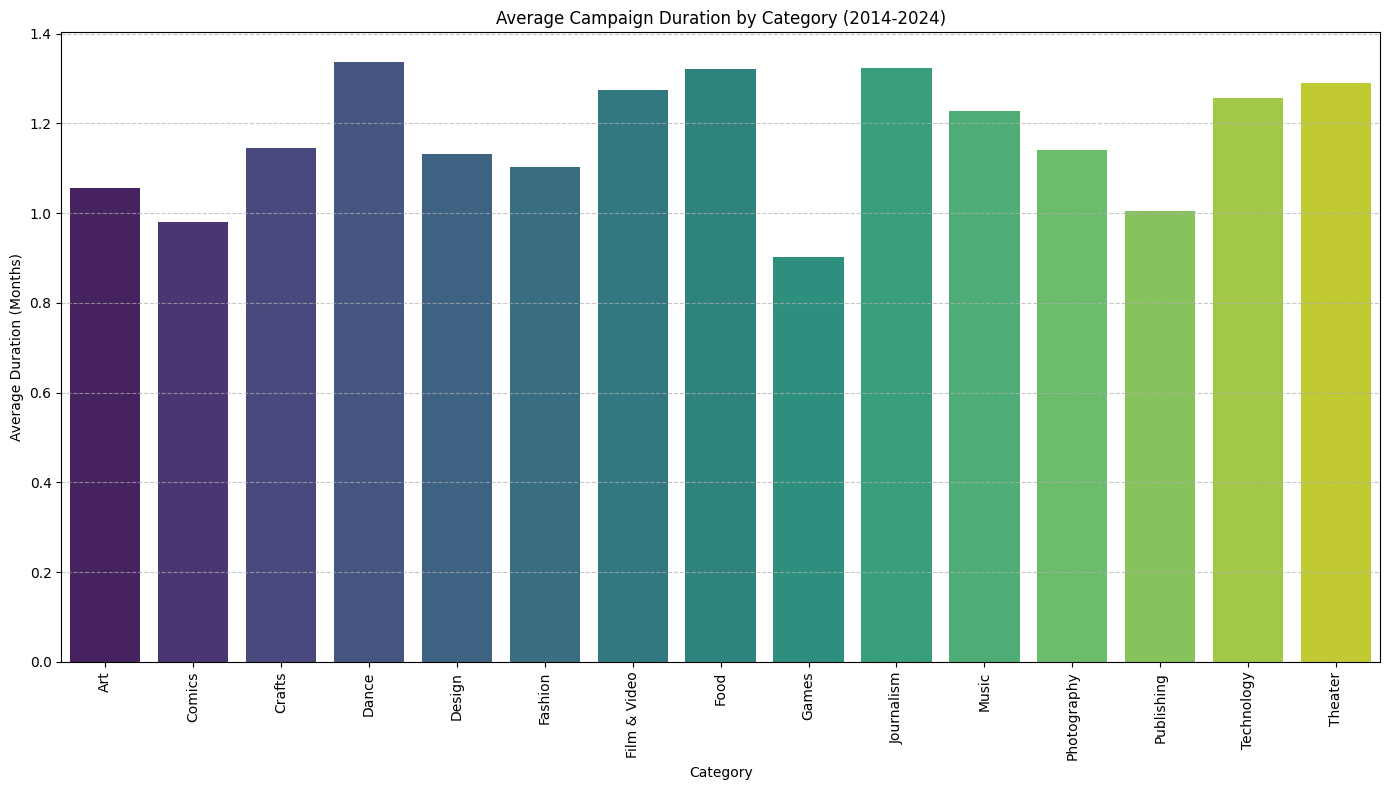

📊 Average Campaign Duration by Category:
   category_name  months_to_final_state
0            Art               1.055001
1         Comics               0.980695
2         Crafts               1.144933
3          Dance               1.335965
4         Design               1.132003
5        Fashion               1.102249
6   Film & Video               1.275212
7           Food               1.320009
8          Games               0.902215
9     Journalism               1.322442
10         Music               1.226510
11   Photography               1.141250
12    Publishing               1.005708
13    Technology               1.256678
14       Theater               1.290545


In [206]:
# Calculate the average campaign duration by category
avg_duration_by_category = df_final_states_cleaned.groupby('category_name')['months_to_final_state'].mean().reset_index()

# Plot the average campaign duration by category
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_duration_by_category, x='category_name', y='months_to_final_state', palette='viridis')
plt.title("Average Campaign Duration by Category (2014-2024)")
plt.xlabel("Category")
plt.ylabel("Average Duration (Months)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the average campaign duration by category
print("📊 Average Campaign Duration by Category:")
print(avg_duration_by_category)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/1626771756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate_by_category, x='category_name', y='state', palette='viridis')


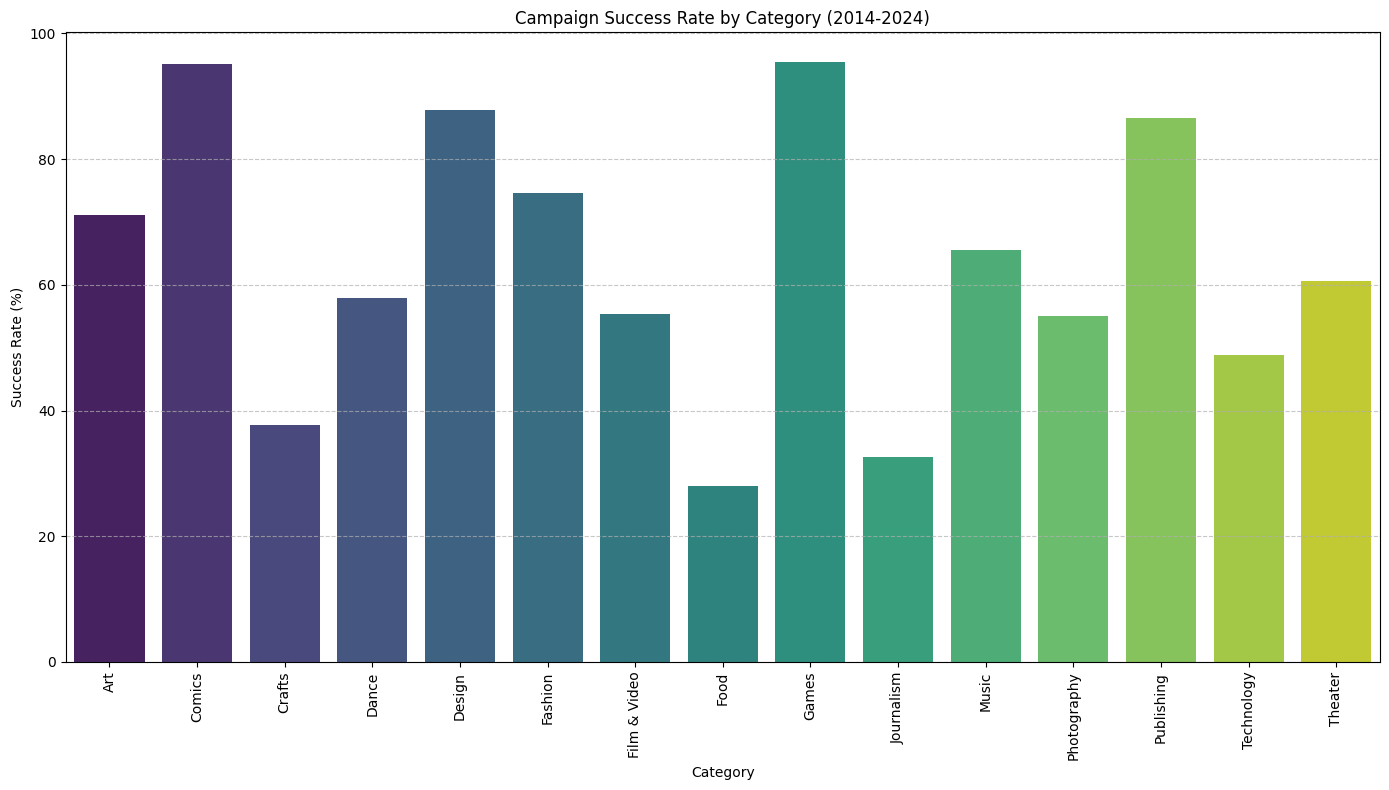

📊 Campaign Success Rate by Category:
   category_name      state
0            Art  71.148709
1         Comics  95.133653
2         Crafts  37.728938
3          Dance  57.894737
4         Design  87.852113
5        Fashion  74.603175
6   Film & Video  55.353241
7           Food  27.966102
8          Games  95.396331
9     Journalism  32.673267
10         Music  65.474723
11   Photography  55.000000
12    Publishing  86.595311
13    Technology  48.771930
14       Theater  60.576923


In [207]:
# Calculate success rate by category
success_rate_by_category = df_final_states_cleaned.groupby('category_name')['state'].apply(lambda x: (x == 'successful').mean() * 100).reset_index()

# Plot the success rate by category
plt.figure(figsize=(14, 8))
sns.barplot(data=success_rate_by_category, x='category_name', y='state', palette='viridis')
plt.title("Campaign Success Rate by Category (2014-2024)")
plt.xlabel("Category")
plt.ylabel("Success Rate (%)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the success rate by category
print("📊 Campaign Success Rate by Category:")
print(success_rate_by_category)


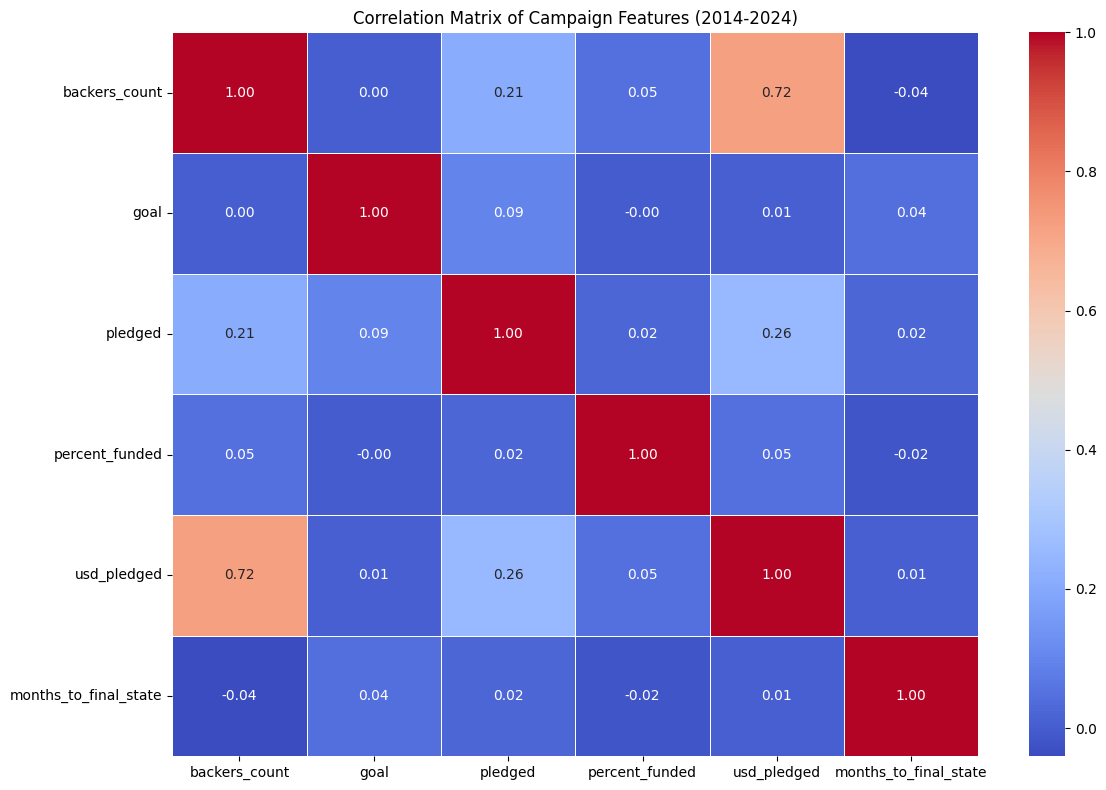

📊 Correlation Matrix of Campaign Features:
                       backers_count      goal   pledged  percent_funded  \
backers_count               1.000000  0.003577  0.209461        0.046414   
goal                        0.003577  1.000000  0.093838       -0.001955   
pledged                     0.209461  0.093838  1.000000        0.023772   
percent_funded              0.046414 -0.001955  0.023772        1.000000   
usd_pledged                 0.722708  0.005121  0.255696        0.048388   
months_to_final_state      -0.040405  0.041267  0.020609       -0.018350   

                       usd_pledged  months_to_final_state  
backers_count             0.722708              -0.040405  
goal                      0.005121               0.041267  
pledged                   0.255696               0.020609  
percent_funded            0.048388              -0.018350  
usd_pledged               1.000000               0.005905  
months_to_final_state     0.005905               1.000000  


In [208]:
# Select relevant numeric columns for correlation analysis
numeric_cols = ['backers_count', 'goal', 'pledged', 'percent_funded', 'usd_pledged', 'months_to_final_state']

# Calculate the correlation matrix
corr_matrix = df_final_states_cleaned[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Campaign Features (2014-2024)")
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("📊 Correlation Matrix of Campaign Features:")
print(corr_matrix)


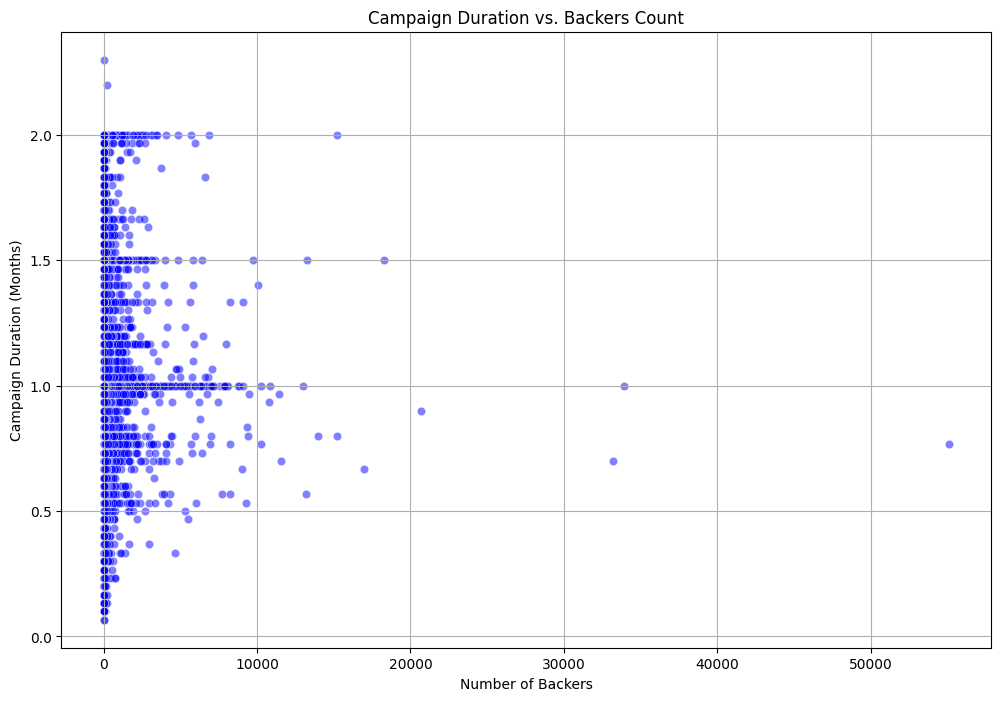

Correlation between Backers Count and Campaign Duration: -0.04


In [210]:
# Scatter plot: Campaign Duration vs. Backers Count
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_final_states_cleaned, x='backers_count', y='months_to_final_state', alpha=0.5, color='blue')
plt.title("Campaign Duration vs. Backers Count")
plt.xlabel("Number of Backers")

plt.ylabel("Campaign Duration (Months)")
plt.grid(True)
plt.show()

# Calculate the correlation between backers_count and months_to_final_state
correlation = df_final_states_cleaned['backers_count'].corr(df_final_states_cleaned['months_to_final_state'])
print(f"Correlation between Backers Count and Campaign Duration: {correlation:.2f}")


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/4017815113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final_states_cleaned, x='months_to_final_state', y='category_name', palette='viridis')


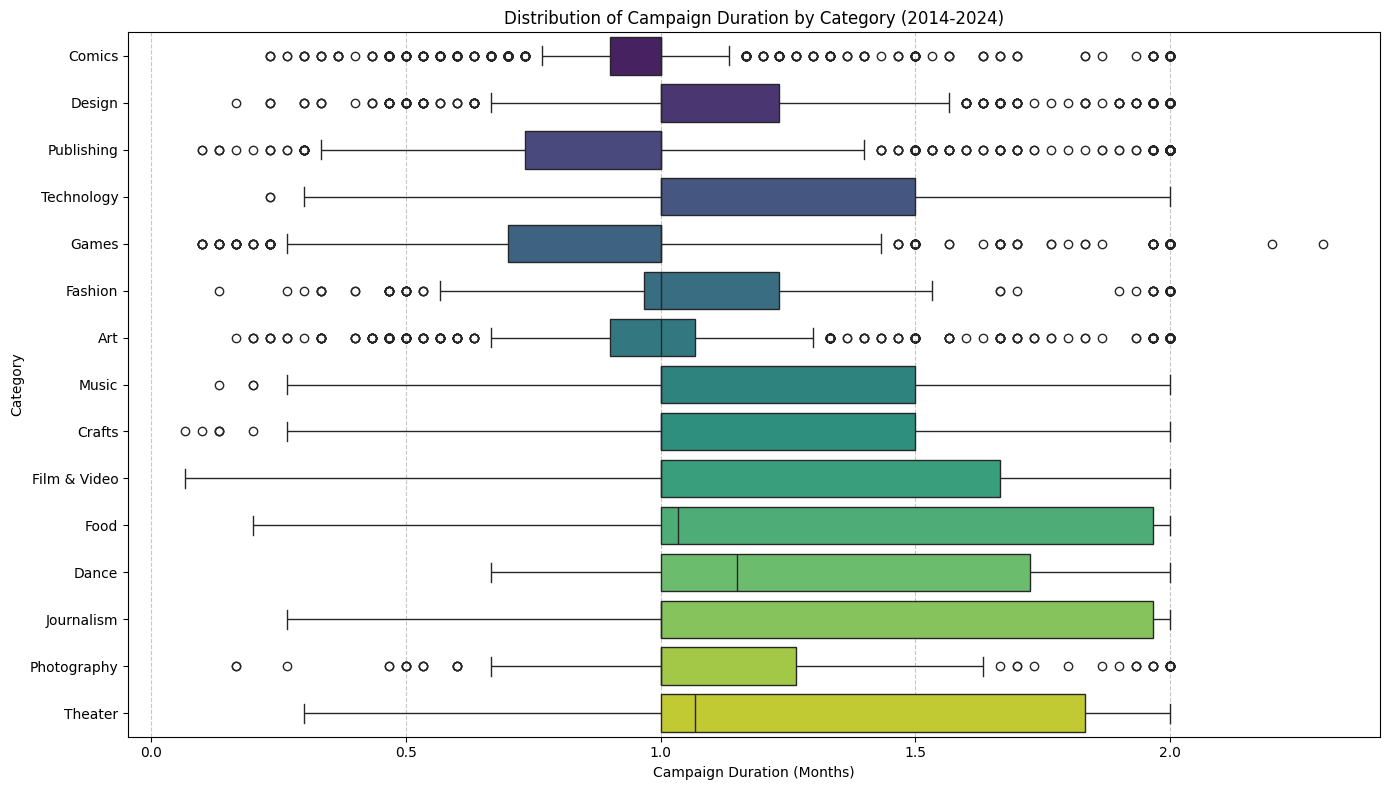

📊 Campaign Duration by Category Summary:
                count      mean       std       min       25%       50%  \
category_name                                                             
Art            1123.0  1.055001  0.393822  0.166667  0.900000  1.000000   
Comics         1459.0  0.980695  0.286627  0.233333  0.900000  1.000000   
Crafts          273.0  1.144933  0.459779  0.066667  1.000000  1.000000   
Dance            38.0  1.335965  0.444545  0.666667  1.000000  1.150000   
Design         1704.0  1.132003  0.349882  0.166667  1.000000  1.000000   
Fashion         504.0  1.102249  0.398544  0.133333  0.966667  1.000000   
Film & Video   1373.0  1.275212  0.455561  0.066667  1.000000  1.000000   
Food            708.0  1.320009  0.460565  0.200000  1.000000  1.033333   
Games          2889.0  0.902215  0.323997  0.100000  0.700000  1.000000   
Journalism      101.0  1.322442  0.497172  0.266667  1.000000  1.000000   
Music           811.0  1.226510  0.436264  0.133333  1.0000

In [211]:
# Boxplot: Campaign Duration by Category
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_final_states_cleaned, x='months_to_final_state', y='category_name', palette='viridis')
plt.title("Distribution of Campaign Duration by Category (2014-2024)")
plt.xlabel("Campaign Duration (Months)")
plt.ylabel("Category")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the summary statistics for campaign duration by category
category_duration_summary = df_final_states_cleaned.groupby('category_name')['months_to_final_state'].describe()
print("📊 Campaign Duration by Category Summary:")
print(category_duration_summary)


<Figure size 1400x800 with 0 Axes>

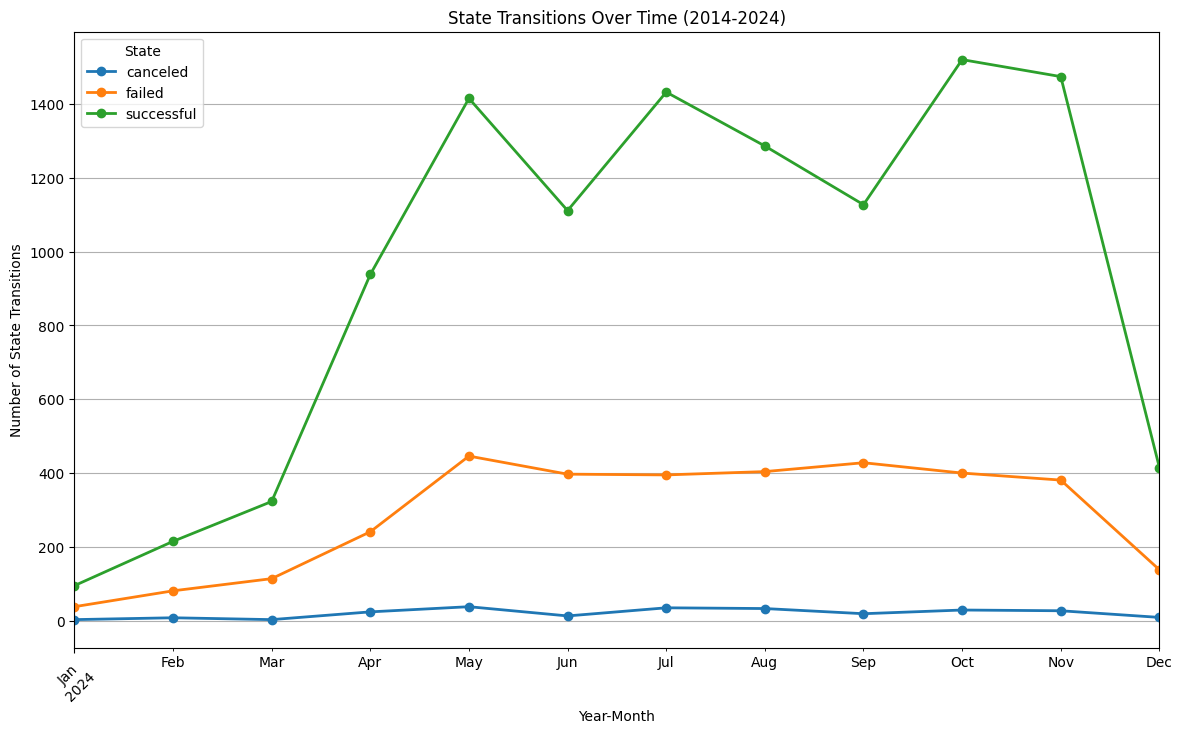

📊 State Transition Counts Over Time:
state             canceled  failed  successful
state_changed_at                              
2024-08                 33     404        1286
2024-09                 19     428        1127
2024-10                 29     400        1520
2024-11                 27     381        1474
2024-12                  9     138         415


In [212]:
# Count the number of state changes by state and time
state_transition_counts = df_final_states_cleaned.groupby([df_final_states_cleaned['state_changed_at'].dt.to_period('M'), 'state']).size().unstack(fill_value=0)

# Plot the state transitions over time
plt.figure(figsize=(14, 8))
state_transition_counts.plot(kind='line', marker='o', figsize=(14, 8), linewidth=2)
plt.title("State Transitions Over Time (2014-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Number of State Transitions")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='State')
plt.show()

# Display the state transition counts
print("📊 State Transition Counts Over Time:")
print(state_transition_counts.tail())


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/1566025606.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_categories, x='category_name', y='campaign_count', palette='viridis')


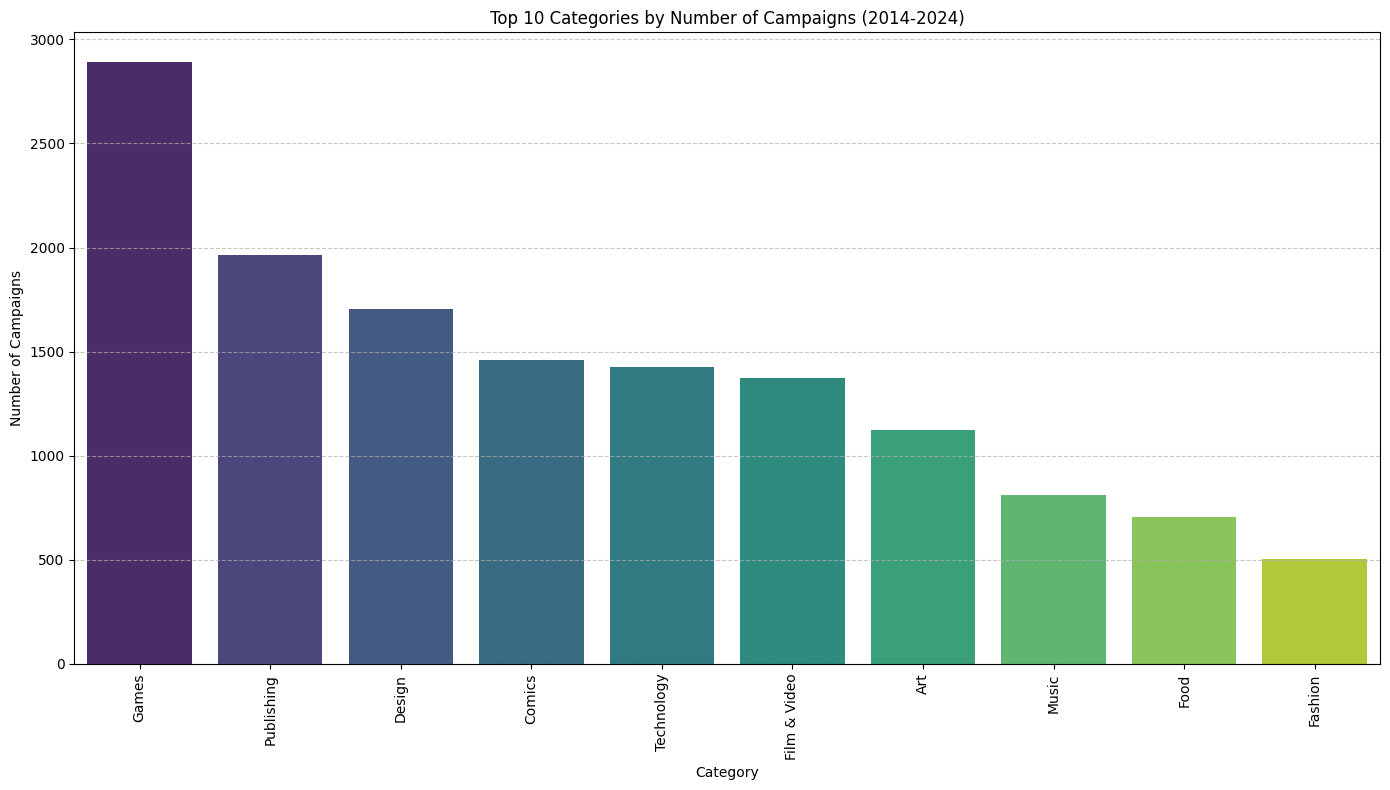

📊 Top 10 Categories by Number of Campaigns:
  category_name  campaign_count
0         Games            2889
1    Publishing            1962
2        Design            1704
3        Comics            1459
4    Technology            1425
5  Film & Video            1373
6           Art            1123
7         Music             811
8          Food             708
9       Fashion             504


In [213]:
# Count the number of campaigns per category
category_campaign_count = df_final_states_cleaned['category_name'].value_counts().reset_index()
category_campaign_count.columns = ['category_name', 'campaign_count']

# Plot the top 10 categories by number of campaigns
top_10_categories = category_campaign_count.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_categories, x='category_name', y='campaign_count', palette='viridis')
plt.title("Top 10 Categories by Number of Campaigns (2014-2024)")
plt.xlabel("Category")
plt.ylabel("Number of Campaigns")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the top 10 categories
print("📊 Top 10 Categories by Number of Campaigns:")
print(top_10_categories)


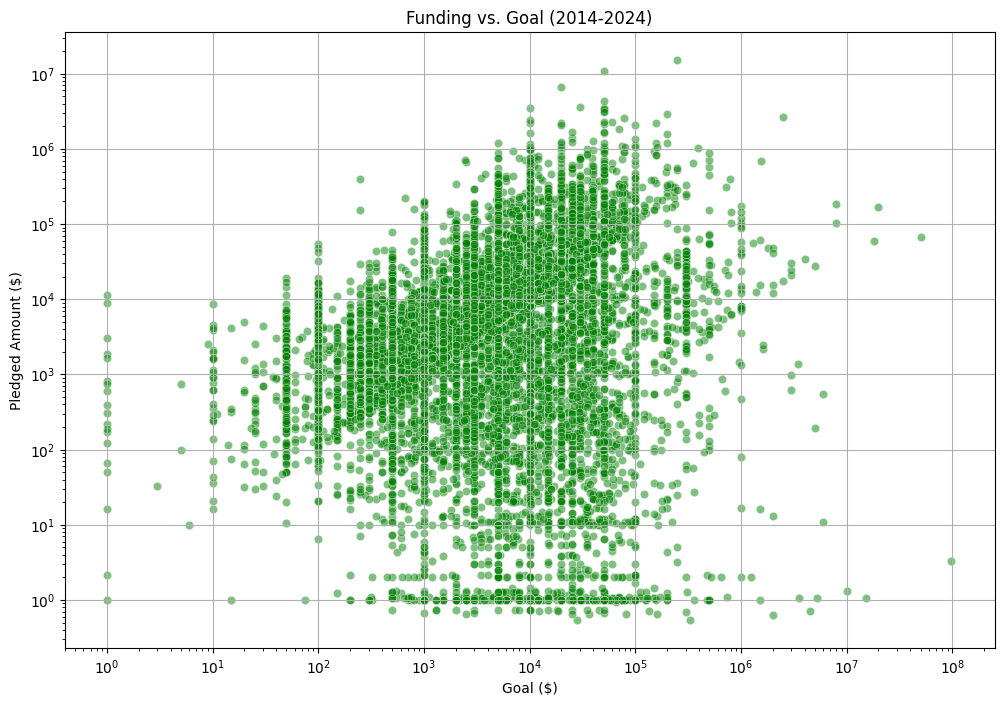

Correlation between Goal and Pledged Amount: 0.01


In [215]:
# Scatter plot: Funding vs Goal
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_final_states_cleaned, x='goal', y='usd_pledged', alpha=0.5, color='green')
plt.title("Funding vs. Goal (2014-2024)")
plt.xlabel("Goal ($)")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Pledged Amount ($)")
plt.grid(True)
plt.show()

# Calculate correlation between goal and usd_pledged
correlation_goal_funding = df_final_states_cleaned['goal'].corr(df_final_states_cleaned['usd_pledged'])
print(f"Correlation between Goal and Pledged Amount: {correlation_goal_funding:.2f}")


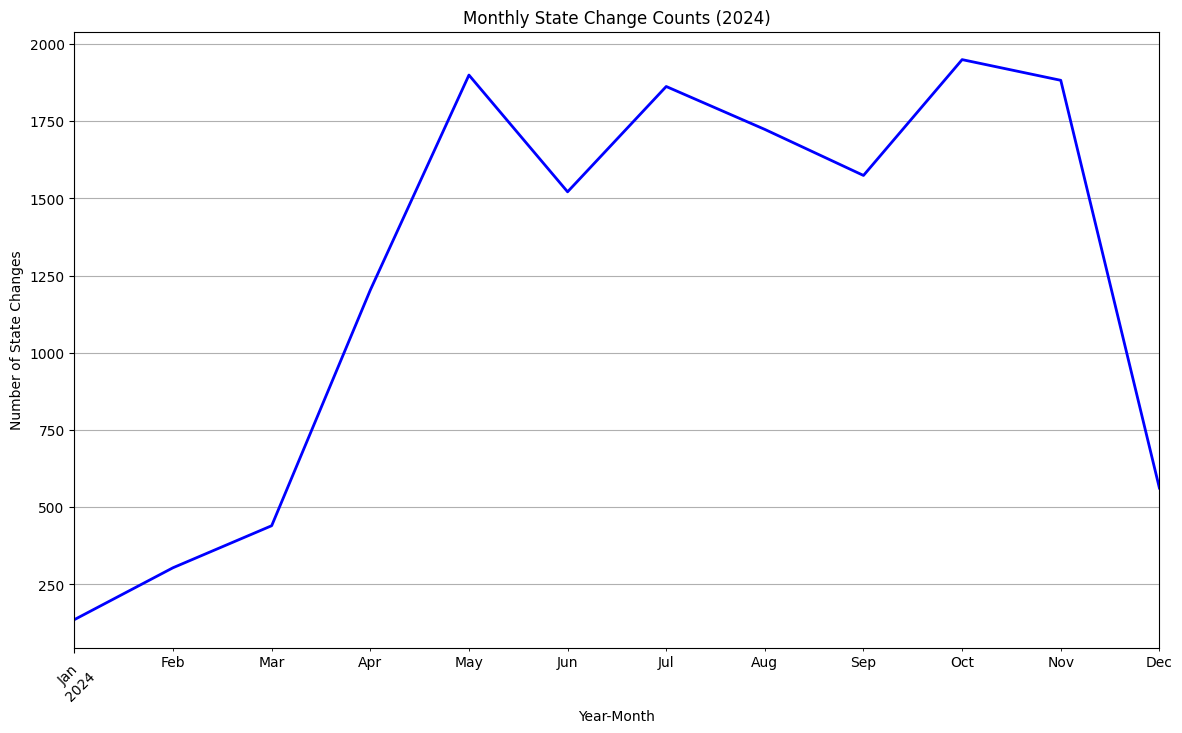

📊 Monthly State Change Counts:
state_changed_at
2024-08    1723
2024-09    1574
2024-10    1949
2024-11    1882
2024-12     562
Freq: M, dtype: int64


In [216]:
# Group by month to count state changes
state_changes_by_month = df_final_states_cleaned.groupby(df_final_states_cleaned['state_changed_at'].dt.to_period('M')).size()

# Plot the monthly state change counts
plt.figure(figsize=(14, 8))
state_changes_by_month.plot(kind='line', color='b', linewidth=2)
plt.title("Monthly State Change Counts (2024)")
plt.xlabel("Year-Month")
plt.ylabel("Number of State Changes")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Display the state change counts by month
print("📊 Monthly State Change Counts:")
print(state_changes_by_month.tail())


In [217]:
# Find the campaigns with the shortest and longest duration to final state
shortest_duration_campaigns = df_final_states_cleaned.loc[df_final_states_cleaned['months_to_final_state'].idxmin()]
longest_duration_campaigns = df_final_states_cleaned.loc[df_final_states_cleaned['months_to_final_state'].idxmax()]

print("📊 Campaign with the Shortest Duration to Final State:")
print(shortest_duration_campaigns[['id', 'months_to_final_state', 'state_changed_at', 'state']])

print("\n📊 Campaign with the Longest Duration to Final State:")
print(longest_duration_campaigns[['id', 'months_to_final_state', 'state_changed_at', 'state']])


📊 Campaign with the Shortest Duration to Final State:
id                                 261279249
months_to_final_state               0.066667
state_changed_at         2024-04-15 13:00:34
state                               canceled
Name: 470374, dtype: object

📊 Campaign with the Longest Duration to Final State:
id                                1965904596
months_to_final_state                    2.3
state_changed_at         2024-06-02 01:05:27
state                                 failed
Name: 644843, dtype: object


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/2868532411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_states_cleaned['backer_range'] = pd.cut(df_final_states_cleaned['backers_count'], bins=backer_count_bins, labels=backer_labels)
/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/2868532411.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_backers = df_final_states_cleaned.groupby('backer_range')['state'].apply(
/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_2105/2868532411.py:14: Future

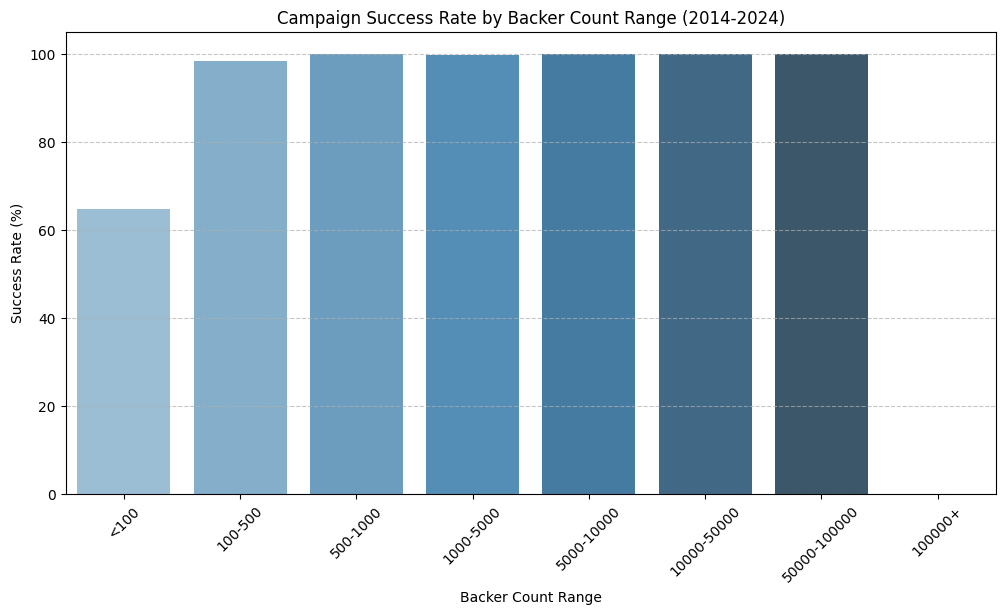

📊 Success Rate by Backer Count Range:
   backer_range       state
0          <100   64.721340
1       100-500   98.447283
2      500-1000  100.000000
3     1000-5000   99.846154
4    5000-10000  100.000000
5   10000-50000  100.000000
6  50000-100000  100.000000
7       100000+         NaN


In [220]:
# Calculate the success rate based on backer count ranges
backer_count_bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
backer_labels = ['<100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000', '100000+']

df_final_states_cleaned['backer_range'] = pd.cut(df_final_states_cleaned['backers_count'], bins=backer_count_bins, labels=backer_labels)

# Calculate the success rate for each backer range
success_by_backers = df_final_states_cleaned.groupby('backer_range')['state'].apply(
    lambda x: (x == 'successful').mean() * 100  # Success rate as percentage
).reset_index()

# Plot success rate vs. backer range
plt.figure(figsize=(12, 6))
sns.barplot(data=success_by_backers, x='backer_range', y='state', palette='Blues_d')
plt.title("Campaign Success Rate by Backer Count Range (2014-2024)")
plt.xlabel("Backer Count Range")
plt.ylabel("Success Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display success rate by backer range
print("📊 Success Rate by Backer Count Range:")
print(success_by_backers)


In [221]:
# Find the campaigns with the highest and lowest pledged amounts
highest_funding_campaigns = df_final_states_cleaned.loc[df_final_states_cleaned['usd_pledged'].idxmax()]
lowest_funding_campaigns = df_final_states_cleaned.loc[df_final_states_cleaned['usd_pledged'].idxmin()]

print("📊 Campaign with the Highest Funding:")
print(highest_funding_campaigns[['id', 'usd_pledged', 'state', 'category_name', 'goal']])

print("\n📊 Campaign with the Lowest Funding:")
print(lowest_funding_campaigns[['id', 'usd_pledged', 'state', 'category_name', 'goal']])


📊 Campaign with the Highest Funding:
id                  7816448
usd_pledged      15149874.0
state            successful
category_name         Games
goal               250000.0
Name: 1184744, dtype: object

📊 Campaign with the Lowest Funding:
id               3915761
usd_pledged          0.0
state             failed
category_name        Art
goal              6300.0
Name: 1768253, dtype: object


In [3]:




df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s', errors='coerce')  # Convert to datetime
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit='s', errors='coerce')  # Convert to datetime

# Filter out entries where the dates are from 1970
df = df[df['launched_at'] > '1970-01-01']
df = df[df['state_changed_at'] > '1970-01-01']

# Step 2: Filter out rows where the initial state is a final state (successful, failed, canceled, suspended)
final_states = ['successful', 'failed', 'canceled', 'suspended']

# First, we need to determine the initial state for each campaign (based on the first 'state_changed_at')
df['initial_state'] = df.groupby('id')['state_changed_at'].transform('min')

# Filter out campaigns where the initial state is one of the final states
df_filtered = df[~df['initial_state'].isin(final_states)]

# Step 3: Keep track of the months it took to reach a final state
# Calculate the months it took to reach the final state
df_filtered['months_to_final_state'] = ((df_filtered['state_changed_at'] - df_filtered['launched_at']).dt.days / 30).round()

# Step 4: Remove subsequent entries after the campaign reaches a final state
# Keep only the rows where the final state is reached (remove duplicates based on the 'id' and 'state_changed_at')
df_filtered = df_filtered.drop_duplicates(subset=['id', 'state'], keep='first')

# Show the result
print("Filtered Data (first few rows):")
print(df_filtered.head())


Filtered Data (first few rows):
   backers_count                                              blurb  \
0              2       Astrological Connections and Personal Wisdom   
1            318  Carbon wallet reimagined | Ultra light | Carbo...   
2             58  Special deluxe omnibus edition of AWARD-WINNIN...   
3            108  Agnimu Rehpot is back for a second printing, a...   
4              1  Cozy Kornerz is a fun new redecorating tool th...   

   converted_pledged_amount country_displayable_name currency  \
0                      51.0        the United States      USD   
1                   27920.0        the United States      USD   
2                    5041.0                   Canada      CAD   
3                    6614.0        the United States      USD   
4                       1.0        the United States      USD   

  current_currency  disable_communication   fx_rate     goal          id  ...  \
0              USD                  False  1.000000  60000.0   890895

In [24]:
df_filtered.shape

(242826, 35)

In [25]:
df_filtered.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'initial_state', 'months_to_final_state'],
      dtype='object')

In [26]:
df_filtered['months_to_final_state'].describe()

count    242826.000000
mean          0.973314
std           0.583690
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: months_to_final_state, dtype: float64

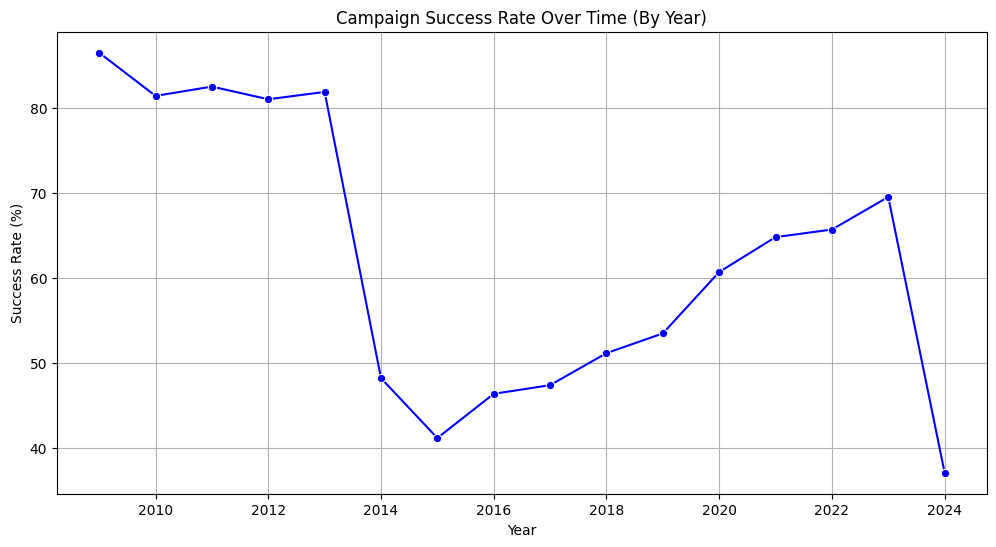

📊 Success Rate by Year:
    launched_at      state
0          2009  86.516854
1          2010  81.439722
2          2011  82.534247
3          2012  81.044248
4          2013  81.905665
5          2014  48.244692
6          2015  41.207745
7          2016  46.407259
8          2017  47.426057
9          2018  51.190024
10         2019  53.507705
11         2020  60.730943
12         2021  64.833468
13         2022  65.724715
14         2023  69.553471
15         2024  37.129492


In [10]:


# Calculate success rate over time (by year)
success_rate_by_year = df_filtered.groupby(df_filtered['launched_at'].dt.year)['state'].apply(
    lambda x: (x == 'successful').mean() * 100  # Calculate percentage of successful campaigns
).reset_index()

# Plot success rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=success_rate_by_year, x='launched_at', y='state', marker='o', color='b')
plt.title("Campaign Success Rate Over Time (By Year)")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.grid(True)
plt.show()

# Display success rate by year
print("📊 Success Rate by Year:")
print(success_rate_by_year)


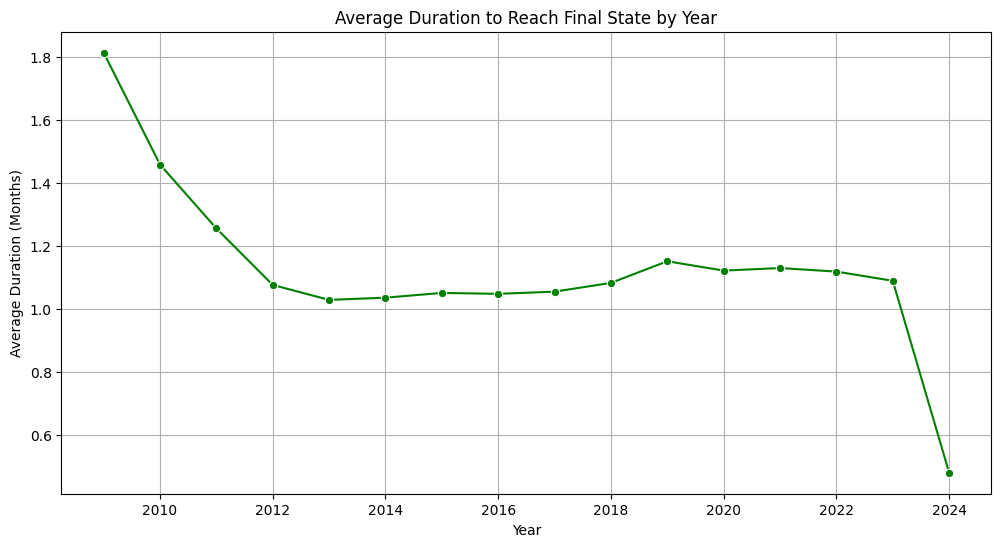

📊 Average Duration to Reach Final State by Year:
    launched_at  months_to_final_state
0          2009               1.814607
1          2010               1.458803
2          2011               1.255604
3          2012               1.075929
4          2013               1.028327
5          2014               1.035527
6          2015               1.050548
7          2016               1.047690
8          2017               1.054652
9          2018               1.082479
10         2019               1.151325
11         2020               1.121545
12         2021               1.129734
13         2022               1.118447
14         2023               1.089159
15         2024               0.478684


In [11]:
# Calculate average duration to final state by year
avg_duration_by_year = df_filtered.groupby(df_filtered['launched_at'].dt.year)['months_to_final_state'].mean().reset_index()

# Plot the average duration to reach final state by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_duration_by_year, x='launched_at', y='months_to_final_state', marker='o', color='g')
plt.title("Average Duration to Reach Final State by Year")
plt.xlabel("Year")
plt.ylabel("Average Duration (Months)")
plt.grid(True)
plt.show()

# Display the average duration by year
print("📊 Average Duration to Reach Final State by Year:")
print(avg_duration_by_year)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_9258/2313916169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution, x='category_name', y='campaign_count', palette='viridis')


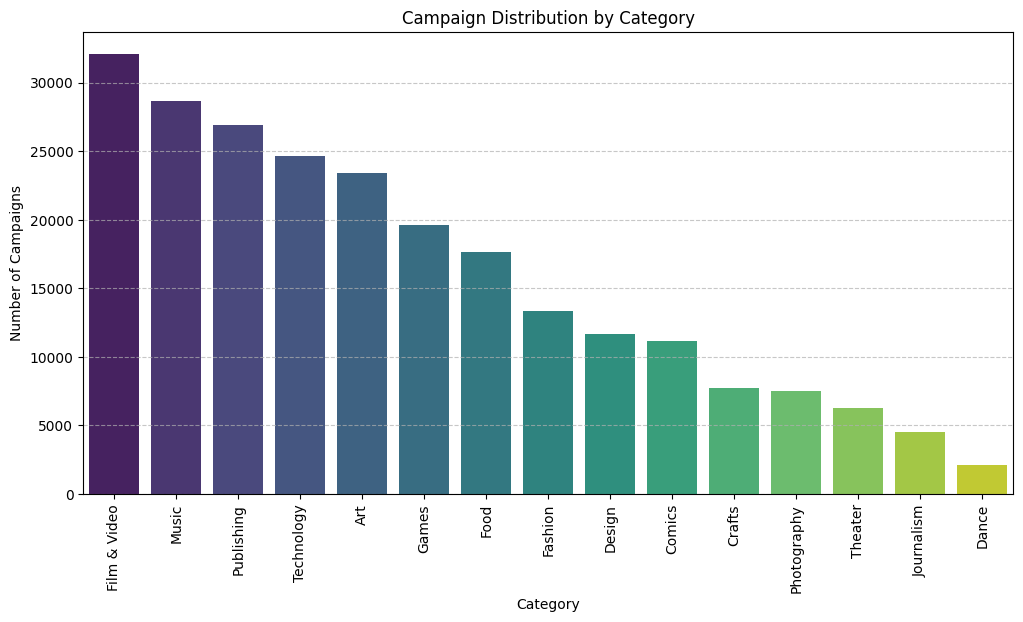

📊 Campaign Distribution by Category:
   category_name  campaign_count
0   Film & Video           32085
1          Music           28687
2     Publishing           26902
3     Technology           24618
4            Art           23409
5          Games           19621
6           Food           17637
7        Fashion           13376
8         Design           11701
9         Comics           11127
10        Crafts            7718
11   Photography            7542
12       Theater            6274
13    Journalism            4489
14         Dance            2135


In [12]:
# Count the number of campaigns per category
category_distribution = df_filtered['category_name'].value_counts().reset_index()
category_distribution.columns = ['category_name', 'campaign_count']

# Plot the distribution of campaigns by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_distribution, x='category_name', y='campaign_count', palette='viridis')
plt.title("Campaign Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Campaigns")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the campaign distribution by category
print("📊 Campaign Distribution by Category:")
print(category_distribution)


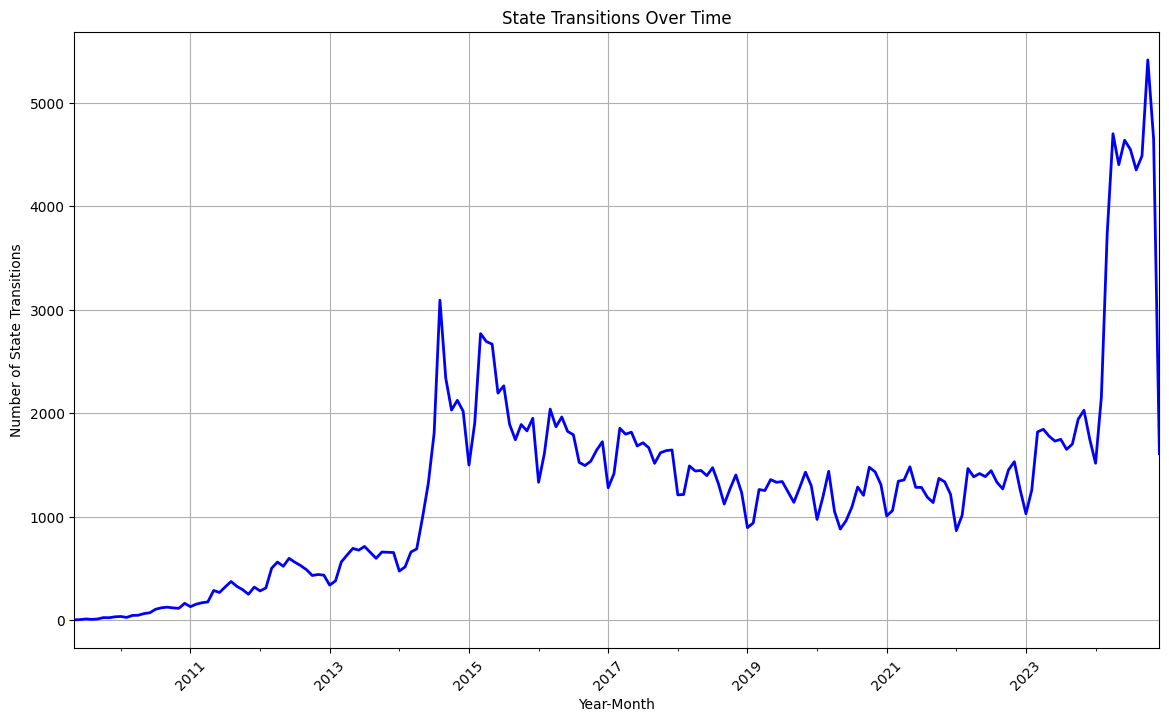

📊 State Transitions Over Time:
state_changed_at
2009-05       2
2009-06       5
2009-07      11
2009-08       7
2009-09      11
           ... 
2024-08    4351
2024-09    4486
2024-10    5414
2024-11    4651
2024-12    1608
Freq: M, Length: 188, dtype: int64


In [13]:
# Count the number of state transitions per month
state_transitions_per_month = df_filtered.groupby(df_filtered['state_changed_at'].dt.to_period('M')).size()

# Plot the state transitions over time
plt.figure(figsize=(14, 8))
state_transitions_per_month.plot(kind='line', color='b', linewidth=2)
plt.title("State Transitions Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of State Transitions")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Display the state transitions over time
print("📊 State Transitions Over Time:")
print(state_transitions_per_month)


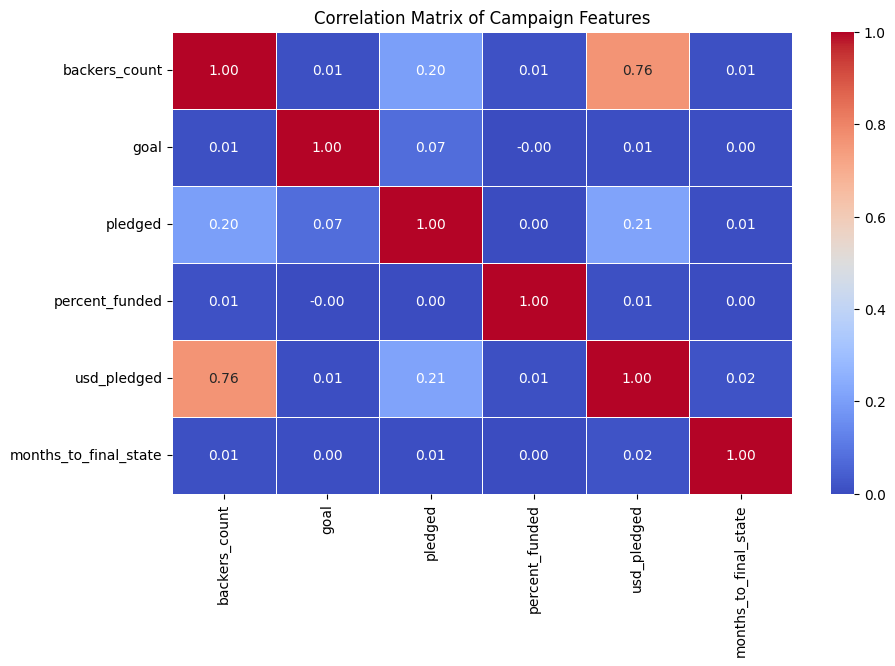

📊 Correlation Matrix of Campaign Features:
                       backers_count      goal   pledged  percent_funded  \
backers_count               1.000000  0.008110  0.202576        0.014240   
goal                        0.008110  1.000000  0.074632       -0.000246   
pledged                     0.202576  0.074632  1.000000        0.002206   
percent_funded              0.014240 -0.000246  0.002206        1.000000   
usd_pledged                 0.763125  0.006955  0.213711        0.010420   
months_to_final_state       0.008981  0.004308  0.005664        0.002698   

                       usd_pledged  months_to_final_state  
backers_count             0.763125               0.008981  
goal                      0.006955               0.004308  
pledged                   0.213711               0.005664  
percent_funded            0.010420               0.002698  
usd_pledged               1.000000               0.017936  
months_to_final_state     0.017936               1.000000  


In [14]:
# Select relevant numeric columns for correlation analysis
numeric_cols = ['backers_count', 'goal', 'pledged', 'percent_funded', 'usd_pledged', 'months_to_final_state']

# Calculate the correlation matrix
corr_matrix = df_filtered[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Campaign Features")
plt.show()

# Display the correlation matrix
print("📊 Correlation Matrix of Campaign Features:")
print(corr_matrix)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_9258/2774121606.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate_by_category, x='category_name', y='state', palette='viridis')


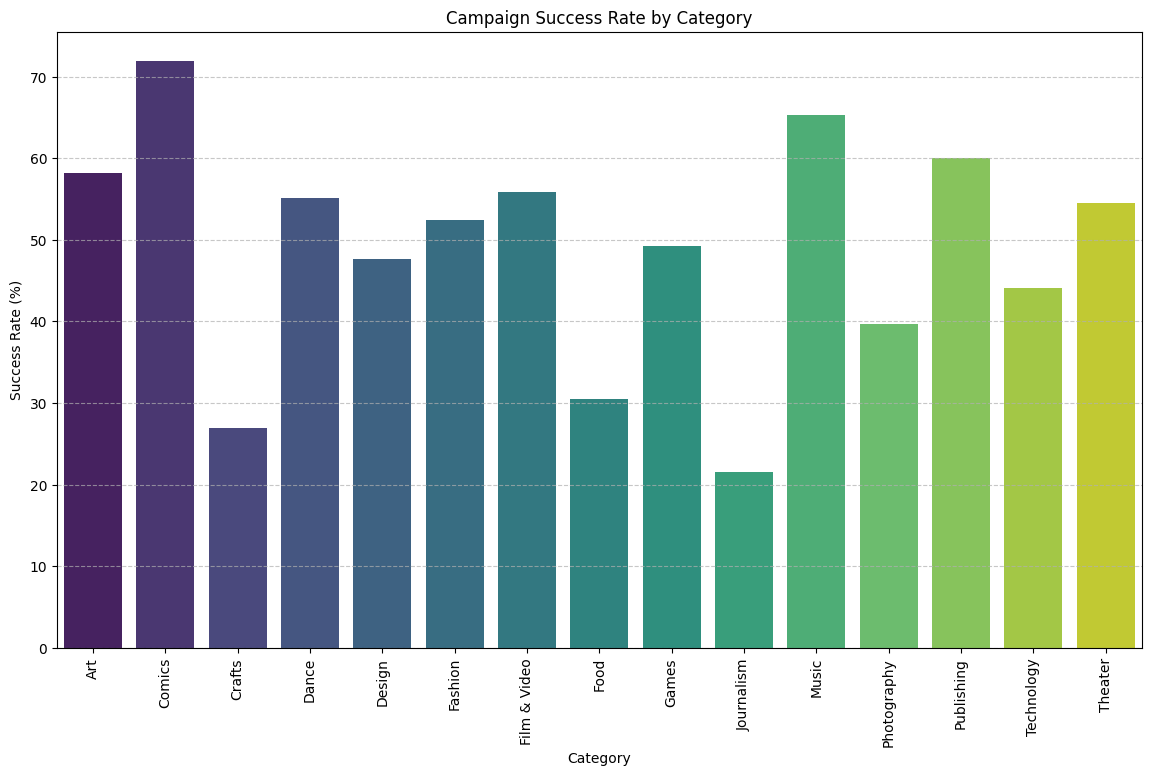

📊 Campaign Success Rate by Category:
   category_name      state
0            Art  58.148575
1         Comics  71.879213
2         Crafts  27.001814
3          Dance  55.128806
4         Design  47.671139
5        Fashion  52.384868
6   Film & Video  55.842294
7           Food  30.470035
8          Games  49.217675
9     Journalism  21.541546
10         Music  65.318786
11   Photography  39.657916
12    Publishing  60.058732
13    Technology  44.093753
14       Theater  54.574434


In [15]:
# Calculate success rate by category
success_rate_by_category = df_filtered.groupby('category_name')['state'].apply(
    lambda x: (x == 'successful').mean() * 100  # Success rate as a percentage
).reset_index()

# Plot success rate by category
plt.figure(figsize=(14, 8))
sns.barplot(data=success_rate_by_category, x='category_name', y='state', palette='viridis')
plt.title("Campaign Success Rate by Category")
plt.xlabel("Category")
plt.ylabel("Success Rate (%)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the success rate by category
print("📊 Campaign Success Rate by Category:")
print(success_rate_by_category)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_9258/414828020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pledged_by_category, x='category_name', y='pledged', palette='viridis')


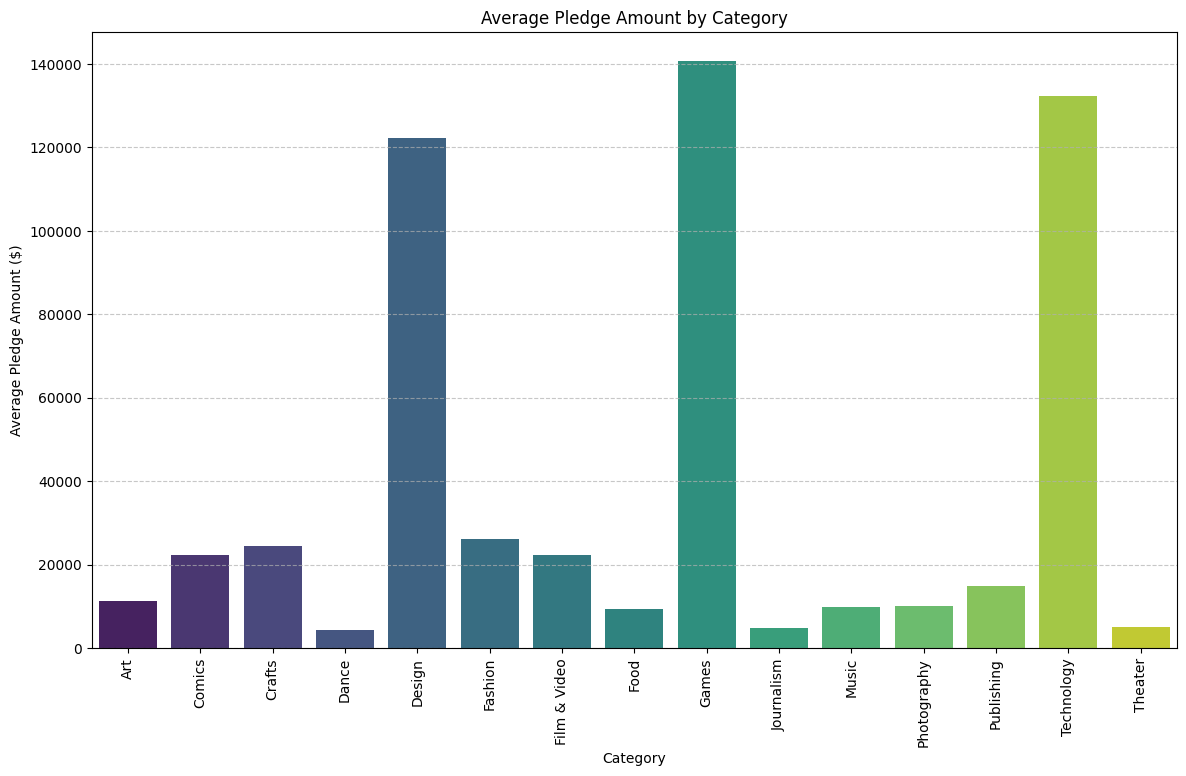

📊 Average Pledge Amount by Category:
   category_name        pledged
0            Art   11172.196574
1         Comics   22218.940130
2         Crafts   24388.229501
3          Dance    4252.566286
4         Design  122102.838895
5        Fashion   26218.746571
6   Film & Video   22384.581167
7           Food    9352.872999
8          Games  140579.673990
9     Journalism    4833.949129
10         Music    9805.824892
11   Photography   10155.776352
12    Publishing   14940.761261
13    Technology  132159.056156
14       Theater    5067.479657


In [16]:
# Calculate average pledged amount by category
avg_pledged_by_category = df_filtered.groupby('category_name')['pledged'].mean().reset_index()

# Plot average pledged amount by category
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_pledged_by_category, x='category_name', y='pledged', palette='viridis')
plt.title("Average Pledge Amount by Category")
plt.xlabel("Category")
plt.ylabel("Average Pledge Amount ($)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the average pledge amount by category
print("📊 Average Pledge Amount by Category:")
print(avg_pledged_by_category)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_9258/2389099966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_backers_by_category, x='category_name', y='backers_count', palette='viridis')


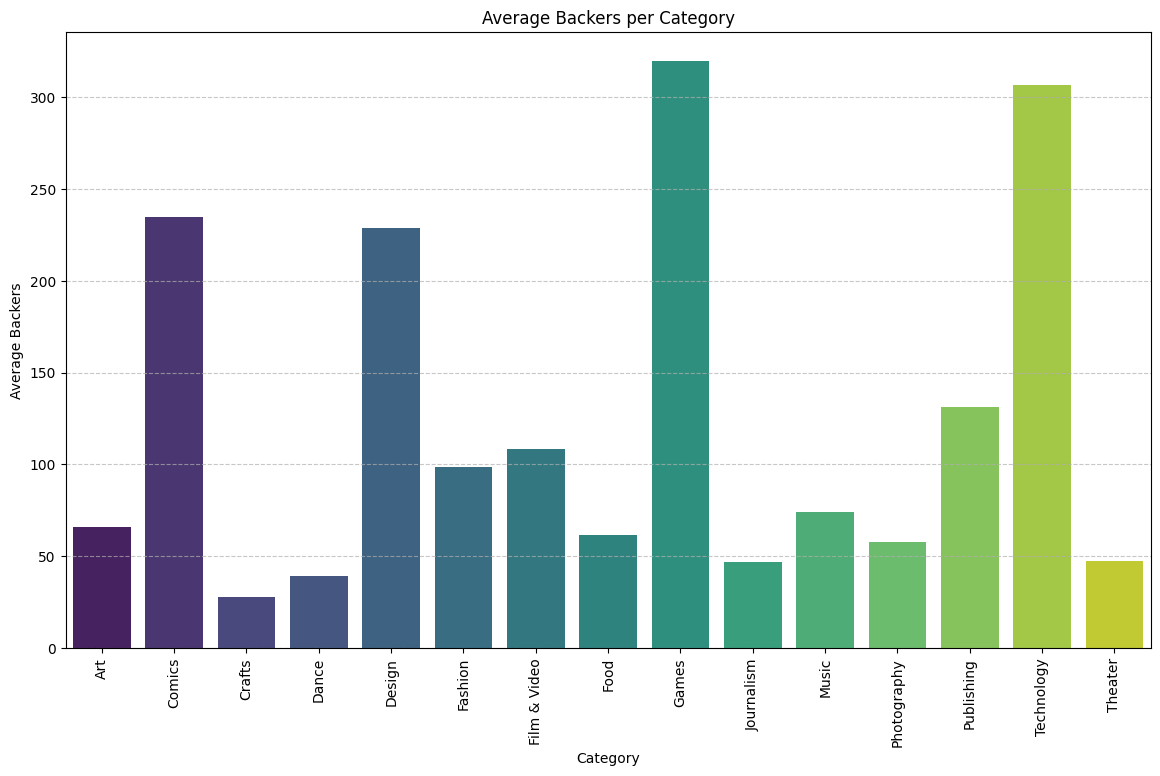

📊 Average Backers per Category:
   category_name  backers_count
0            Art      65.794011
1         Comics     234.534286
2         Crafts      27.667271
3          Dance      39.068852
4         Design     228.960858
5        Fashion      98.757775
6   Film & Video     108.550849
7           Food      61.505868
8          Games     319.468885
9     Journalism      46.780575
10         Music      74.066232
11   Photography      57.940864
12    Publishing     131.123708
13    Technology     306.749167
14       Theater      47.433216


In [17]:
# Calculate average backers per category
avg_backers_by_category = df_filtered.groupby('category_name')['backers_count'].mean().reset_index()

# Plot average backers per category
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_backers_by_category, x='category_name', y='backers_count', palette='viridis')
plt.title("Average Backers per Category")
plt.xlabel("Category")
plt.ylabel("Average Backers")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the average backers per category
print("📊 Average Backers per Category:")
print(avg_backers_by_category)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_9258/669970665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration_by_category, x='category_name', y='months_to_final_state', palette='viridis')


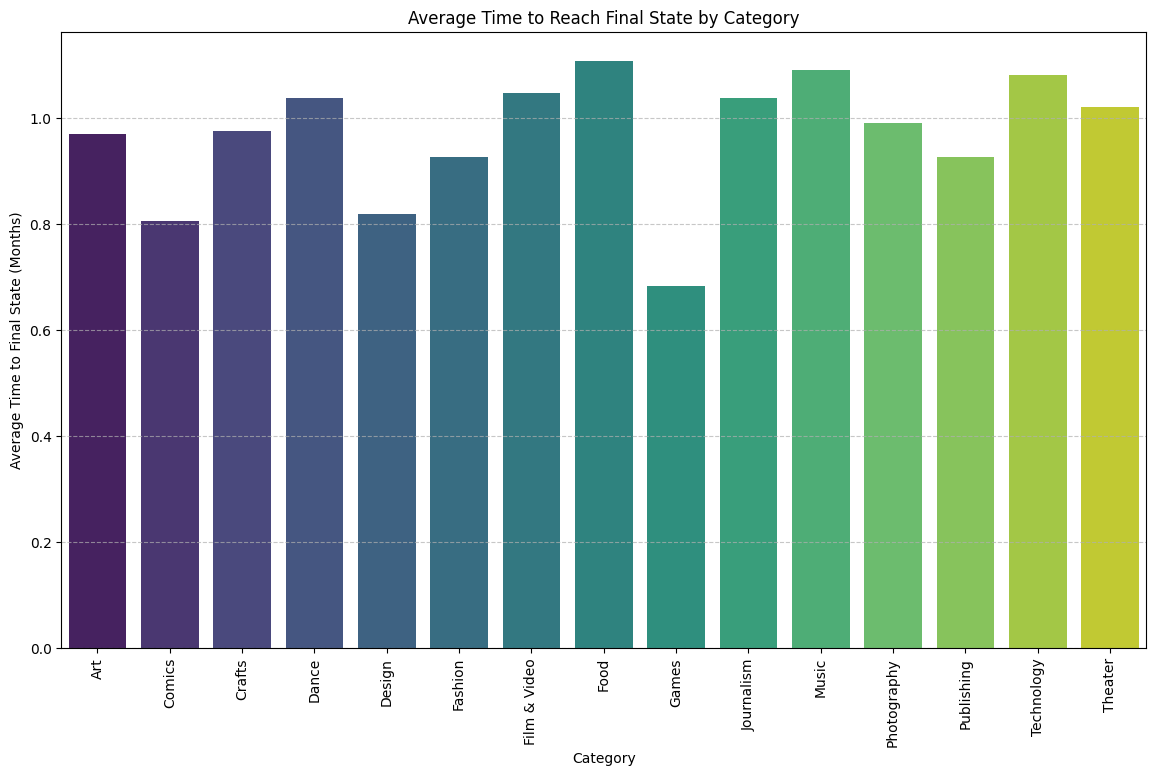

📊 Average Time to Reach Final State by Category:
   category_name  months_to_final_state
0            Art               0.969713
1         Comics               0.804979
2         Crafts               0.975641
3          Dance               1.037471
4         Design               0.818648
5        Fashion               0.925464
6   Film & Video               1.046252
7           Food               1.106651
8          Games               0.682126
9     Journalism               1.037202
10         Music               1.089866
11   Photography               0.990321
12    Publishing               0.925953
13    Technology               1.081485
14       Theater               1.020083


In [18]:
# Calculate average time to reach final state by category
avg_duration_by_category = df_filtered.groupby('category_name')['months_to_final_state'].mean().reset_index()

# Plot average time to reach final state by category
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_duration_by_category, x='category_name', y='months_to_final_state', palette='viridis')
plt.title("Average Time to Reach Final State by Category")
plt.xlabel("Category")
plt.ylabel("Average Time to Final State (Months)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the average time to reach final state by category
print("📊 Average Time to Reach Final State by Category:")
print(avg_duration_by_category)


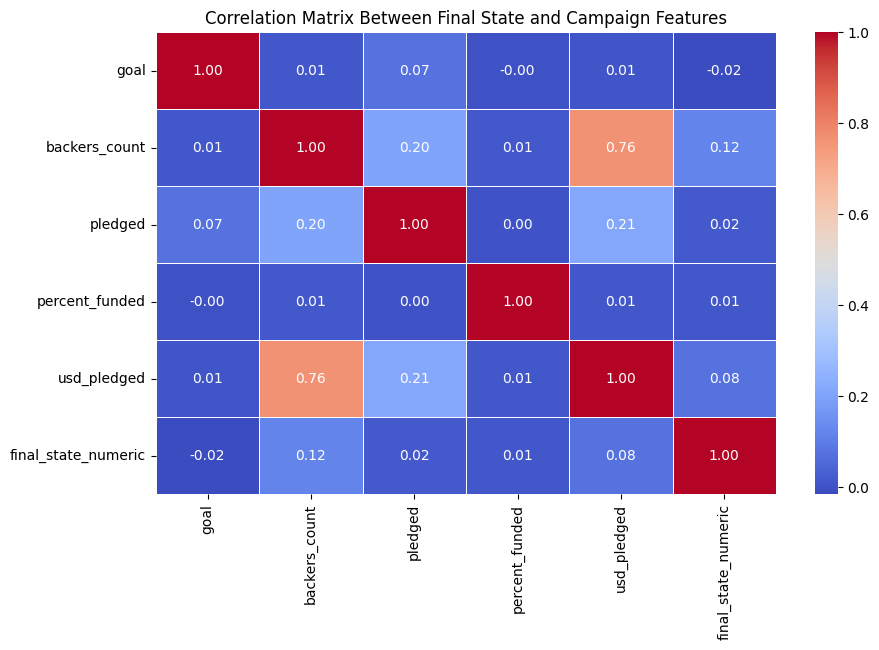

📊 Correlation Matrix Between Final State and Features:
                         goal  backers_count   pledged  percent_funded  \
goal                 1.000000       0.008110  0.074632       -0.000246   
backers_count        0.008110       1.000000  0.202576        0.014240   
pledged              0.074632       0.202576  1.000000        0.002206   
percent_funded      -0.000246       0.014240  0.002206        1.000000   
usd_pledged          0.006955       0.763125  0.213711        0.010420   
final_state_numeric -0.016105       0.115367  0.019268        0.010007   

                     usd_pledged  final_state_numeric  
goal                    0.006955            -0.016105  
backers_count           0.763125             0.115367  
pledged                 0.213711             0.019268  
percent_funded          0.010420             0.010007  
usd_pledged             1.000000             0.075071  
final_state_numeric     0.075071             1.000000  


In [19]:
# Encode final state as numeric for correlation
df_filtered['final_state_numeric'] = df_filtered['state'].apply(lambda x: 1 if x == 'successful' else 0)

# Select relevant numeric columns for correlation analysis
numeric_cols = ['goal', 'backers_count', 'pledged', 'percent_funded', 'usd_pledged', 'final_state_numeric']

# Calculate the correlation matrix
corr_matrix = df_filtered[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Between Final State and Campaign Features")
plt.show()

# Display the correlation matrix
print("📊 Correlation Matrix Between Final State and Features:")
print(corr_matrix)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_9258/38452750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='category_name', y='months_to_final_state', palette='Set2', showfliers=False)


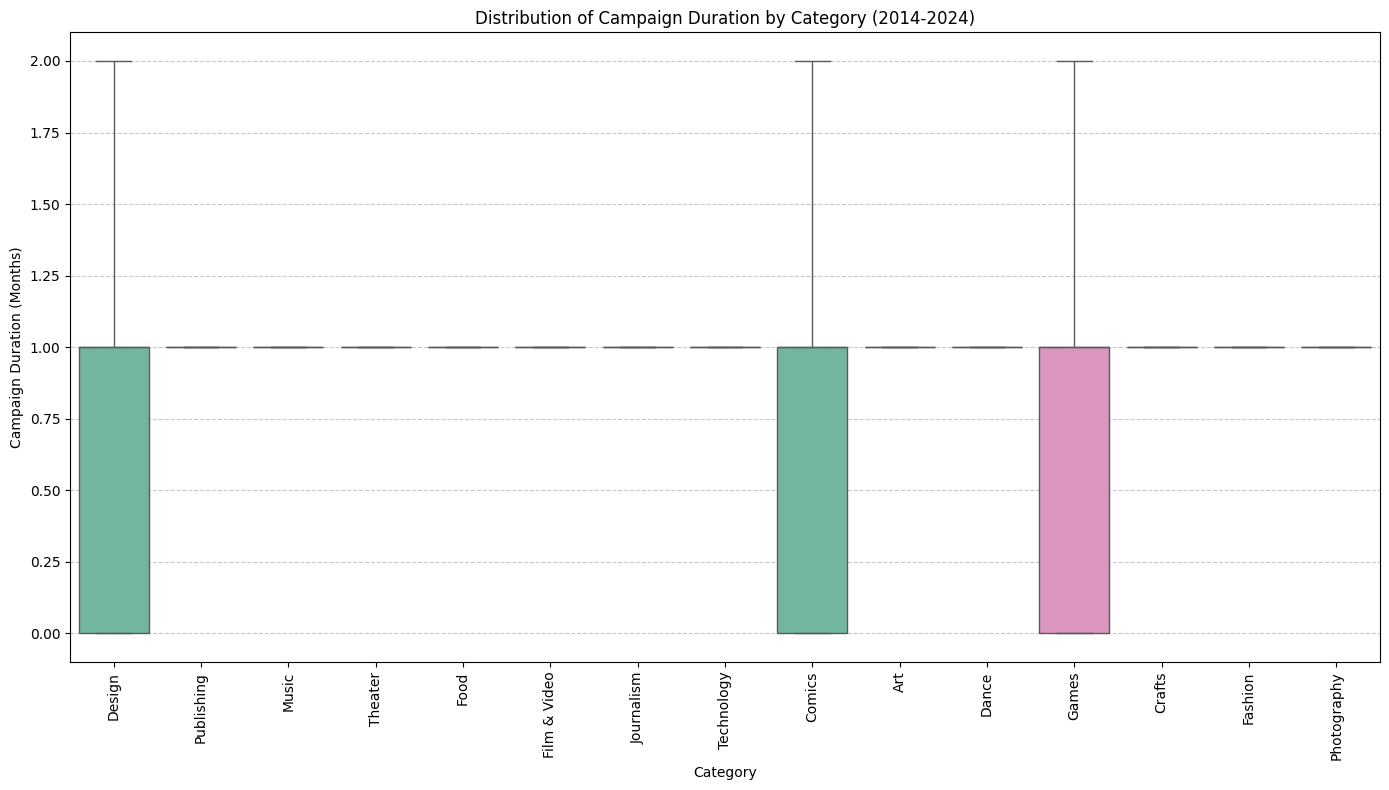

📊 Campaign Duration by Category Summary:
                 count      mean       std  min  25%  50%  75%  max
category_name                                                      
Art            23409.0  0.969713  0.567757  0.0  1.0  1.0  1.0  3.0
Comics         11127.0  0.804979  0.524846  0.0  0.0  1.0  1.0  3.0
Crafts          7718.0  0.975641  0.567969  0.0  1.0  1.0  1.0  3.0
Dance           2135.0  1.037471  0.530690  0.0  1.0  1.0  1.0  2.0
Design         11701.0  0.818648  0.620117  0.0  0.0  1.0  1.0  3.0
Fashion        13376.0  0.925464  0.549915  0.0  1.0  1.0  1.0  4.0
Film & Video   32085.0  1.046252  0.573360  0.0  1.0  1.0  1.0  3.0
Food           17637.0  1.106651  0.571810  0.0  1.0  1.0  1.0  3.0
Games          19621.0  0.682126  0.617384  0.0  0.0  1.0  1.0  3.0
Journalism      4489.0  1.037202  0.603906  0.0  1.0  1.0  1.0  3.0
Music          28687.0  1.089866  0.533815  0.0  1.0  1.0  1.0  3.0
Photography     7542.0  0.990321  0.559933  0.0  1.0  1.0  1.0  2.0
Publish

In [21]:
# Plot the distribution of campaign durations by category
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, x='category_name', y='months_to_final_state', palette='Set2', showfliers=False)
plt.title("Distribution of Campaign Duration by Category (2014-2024)")
plt.xlabel("Category")
plt.ylabel("Campaign Duration (Months)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the campaign duration summary by category
campaign_duration_by_category = df_filtered.groupby('category_name')['months_to_final_state'].describe()
print("📊 Campaign Duration by Category Summary:")
print(campaign_duration_by_category)


Pearson correlation coefficient between backers count and USD pledged: 0.7631


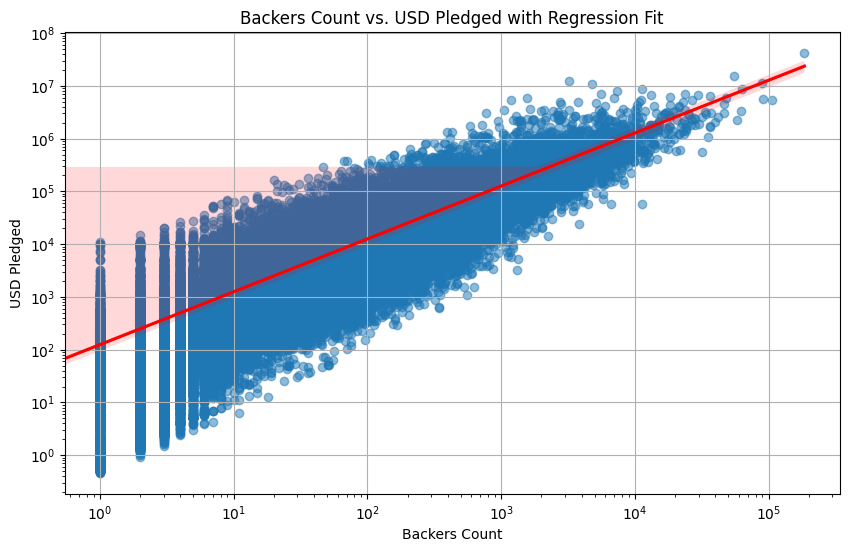

In [29]:




# 1. Calculate the Pearson correlation coefficient between backers_count and usd_pledged
correlation = df_filtered[['backers_count', 'usd_pledged']].corr().iloc[0, 1]
print(f"Pearson correlation coefficient between backers count and USD pledged: {correlation:.4f}")

# 2. Plot the scatter plot with regression fit to visualize the relationship
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='backers_count', y='usd_pledged', data=df_filtered, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Set log scale for the y-axis using matplotlib
ax.set_xscale('log')
ax.set_yscale('log')

# Titles and labels
plt.title("Backers Count vs. USD Pledged with Regression Fit")
plt.xlabel("Backers Count")
plt.ylabel("USD Pledged")
plt.grid(True)
plt.show()


In [33]:
df_filtered['goal'].describe()

count    2.428260e+05
mean     6.576150e+04
std      3.165483e+06
min      1.000000e-02
25%      1.500000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+09
Name: goal, dtype: float64

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_9258/3256556697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='goal', y='category_name', showfliers=True, palette='coolwarm')


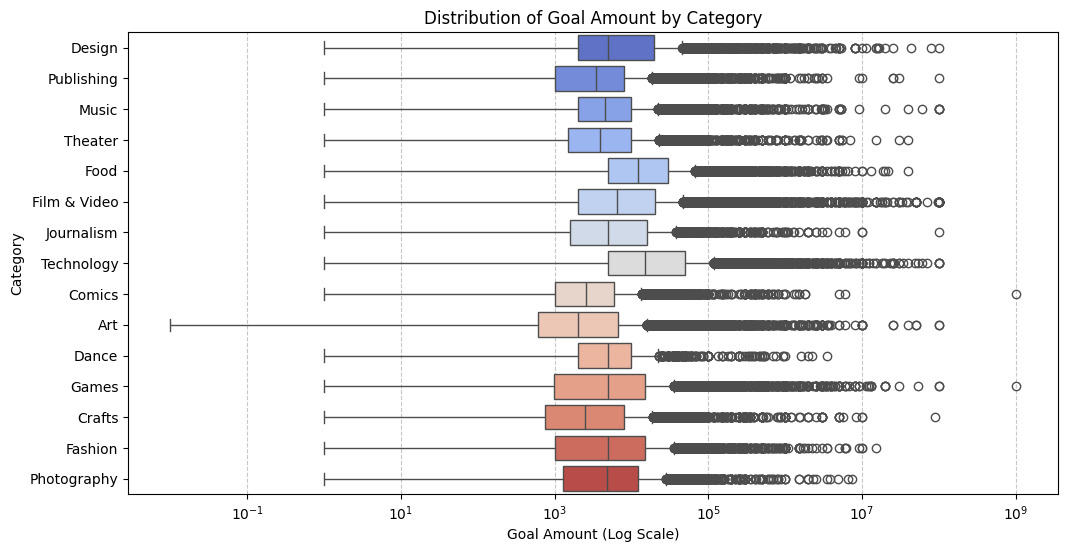

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='goal', y='category_name', showfliers=True, palette='coolwarm')
plt.xscale('log')  # Log scale to handle wide range of goal values
plt.xlabel('Goal Amount (Log Scale)')
plt.ylabel('Category')
plt.title('Distribution of Goal Amount by Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1200x600 with 0 Axes>

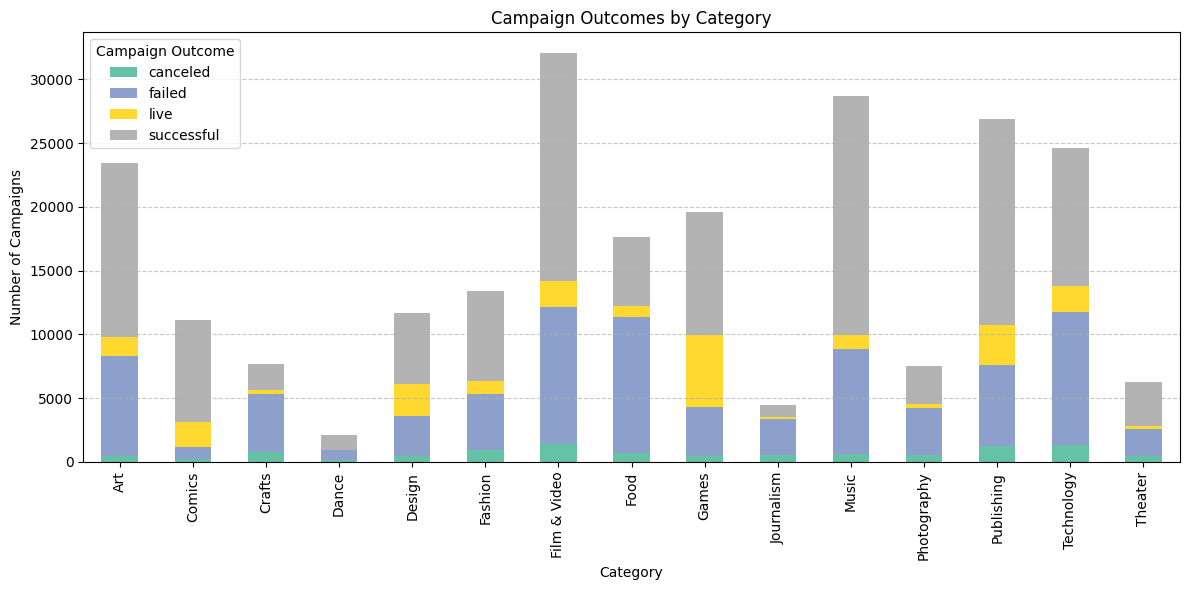

In [38]:


# Group the data by 'category_name' and 'state', then count the occurrences of each state
category_outcomes = df_filtered.groupby(['category_name', 'state']).size().unstack(fill_value=0)

# Plot the stacked bar chart for campaign outcomes by category
plt.figure(figsize=(12, 6))
category_outcomes.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Campaign Outcomes by Category")
plt.xlabel("Category")
plt.ylabel("Number of Campaigns")
plt.xticks(rotation=90)
plt.legend(title='Campaign Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


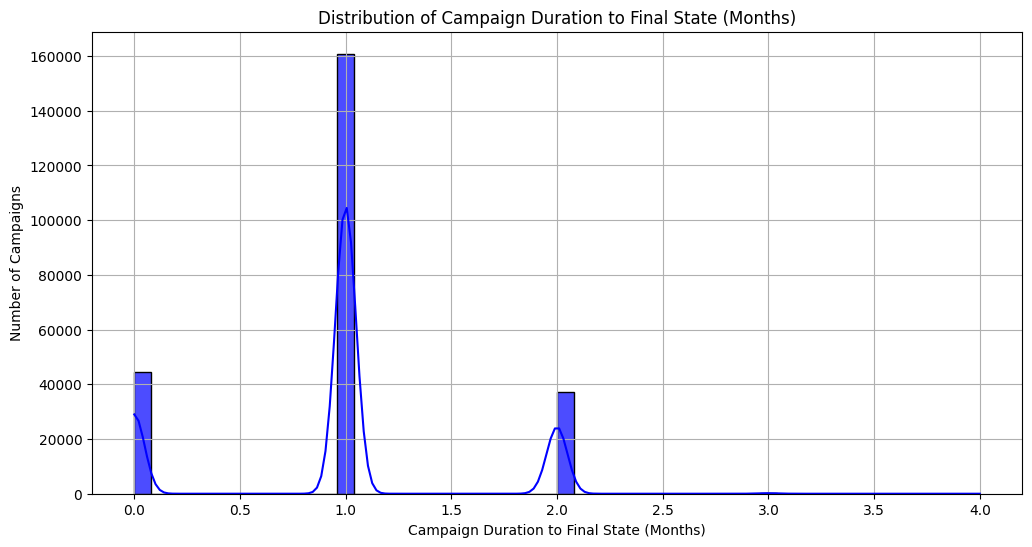

In [40]:



plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['months_to_final_state'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title("Distribution of Campaign Duration to Final State (Months)")
plt.xlabel("Campaign Duration to Final State (Months)")
plt.ylabel("Number of Campaigns")
plt.grid(True)
plt.show()


In [41]:
df_filtered.shape

(242826, 36)

In [43]:


# Create a contingency table between 'category_name' and 'state'
contingency_table = pd.crosstab(df_filtered['category_name'], df_filtered['state'])

# Display the contingency table
print("Contingency Table (category_name vs. state):")
print(contingency_table)


Contingency Table (category_name vs. state):
state          canceled  failed  live  successful
category_name                                    
Art                 506    7777  1514       13612
Comics              227     936  1966        7998
Crafts              754    4553   327        2084
Dance               127     786    45        1177
Design              453    3115  2555        5578
Fashion             965    4352  1052        7007
Film & Video       1404   10746  2018       17917
Food                690   10684   889        5374
Games               499    3780  5685        9657
Journalism          533    2858   131         967
Music               598    8258  1093       18738
Photography         521    3741   289        2991
Publishing         1247    6338  3160       16157
Technology         1305   10427  2031       10855
Theater             461    2161   228        3424


In [44]:
import scipy.stats as stats

# Create a contingency table (as done above)
contingency_table = pd.crosstab(df_filtered['category_name'], df_filtered['state'])

# Perform Chi-Square Test of Independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results of the Chi-Square test
print(f"Chi-Square Test Result:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies: \n{expected}")


Chi-Square Test Result:
Chi2 Statistic: 34295.42132101087
P-Value: 0.0
Degrees of Freedom: 42
Expected frequencies: 
[[ 1014.99070879  7941.58716675  2267.00986006 12185.4122644 ]
 [  482.45553491  3774.87463815  1077.57779969  5792.09202725]
 [  334.64472171  2618.35916754   747.43825452  4017.55785624]
 [   92.57145385   724.30640356   206.76090611  1111.36123647]
 [  507.34359791  3969.60619583  1133.16597773  6090.88422853]
 [  579.96991417  4537.85595038  1295.3788666   6962.79526886]
 [ 1391.17334749 10884.95126854  3107.22420266 16701.65118131]
 [  764.72259092  5983.41547524  1708.02908719  9180.83284665]
 [  850.74683656  6656.4945875   1900.16662242 10213.59195351]
 [  194.63852756  1522.9093422    434.73054218  2336.72158806]
 [ 1243.83948323  9732.16758736  2778.14993616 14932.84299325]
 [  327.01353862  2558.65053661   730.39379575  3925.94212902]
 [ 1166.44367755  9126.59993848  2605.28426056 14003.67212341]
 [ 1067.41173347  8351.74475078  2384.0936706  12814.74984515]
 

In [45]:
df_filtered.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'initial_state', 'months_to_final_state',
       'final_state_numeric'],
      dtype='object')

In [46]:
from scipy.stats import chi2_contingency

# Chi-Square Test for subcategory and state
subcategory_state_crosstab = pd.crosstab(df_filtered['subcategory'], df_filtered['state'])

# Perform the Chi-Square test
chi2_stat_subcategory, p_val_subcategory, dof_subcategory, ex_freq_subcategory = chi2_contingency(subcategory_state_crosstab)

# Print results for subcategory
print("Chi-Square Test for Subcategory and State")
print(f"Chi2 Statistic: {chi2_stat_subcategory}")
print(f"P-Value: {p_val_subcategory}")
print(f"Degrees of Freedom: {dof_subcategory}")
print("Expected Frequencies:")
print(ex_freq_subcategory)


Chi-Square Test for Subcategory and State
Chi2 Statistic: 122819.47365425822
P-Value: 0.0
Degrees of Freedom: 480
Expected Frequencies:
[[6.00468237e+01 4.70600203e+02 1.37413275e+02 7.48939698e+02]
 [7.02170690e+01 5.50306660e+02 1.60687225e+02 8.75789046e+02]
 [1.23356601e+02 9.66772895e+02 2.82293609e+02 1.53857689e+03]
 [5.67838699e+01 4.45027715e+02 1.29946217e+02 7.08242198e+02]
 [1.54248721e+01 1.20888126e+02 3.52988230e+01 1.92388179e+02]
 [1.16195053e+02 9.10646265e+02 2.65904870e+02 1.44925381e+03]
 [1.16830694e+02 9.15627919e+02 2.67359492e+02 1.45718190e+03]
 [1.19415631e+02 9.35886643e+02 2.73274954e+02 1.48942277e+03]
 [1.31069037e+02 1.02721696e+03 2.99943021e+02 1.63477098e+03]
 [4.85205456e+01 3.80266219e+02 1.11036133e+02 6.05177102e+02]
 [1.59333844e+01 1.24873448e+02 3.64625205e+01 1.98730647e+02]
 [1.12762595e+02 8.83745336e+02 2.58049912e+02 1.40644216e+03]
 [2.91970794e+01 2.28823952e+02 6.68156293e+01 3.64163339e+02]
 [9.66173309e+00 7.57211337e+01 2.21102518e+0

In [47]:
# Chi-Square Test for city and state
city_state_crosstab = pd.crosstab(df_filtered['city'], df_filtered['state'])

# Perform the Chi-Square test
chi2_stat_city, p_val_city, dof_city, ex_freq_city = chi2_contingency(city_state_crosstab)

# Print results for city
print("Chi-Square Test for City and State")
print(f"Chi2 Statistic: {chi2_stat_city}")
print(f"P-Value: {p_val_city}")
print(f"Degrees of Freedom: {dof_city}")
print("Expected Frequencies:")
print(ex_freq_city)


Chi-Square Test for City and State
Chi2 Statistic: 69677.59332166513
P-Value: 0.0
Degrees of Freedom: 50031
Expected Frequencies:
[[0.04239062 0.3322055  0.09704593 0.52835795]
 [0.04239062 0.3322055  0.09704593 0.52835795]
 [0.04239062 0.3322055  0.09704593 0.52835795]
 ...
 [0.04239062 0.3322055  0.09704593 0.52835795]
 [0.04239062 0.3322055  0.09704593 0.52835795]
 [0.04239062 0.3322055  0.09704593 0.52835795]]


In [48]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242826 entries, 0 to 1962459
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   backers_count                       242826 non-null  int64         
 1   blurb                               242814 non-null  object        
 2   converted_pledged_amount            242826 non-null  float64       
 3   country_displayable_name            242826 non-null  object        
 4   currency                            242826 non-null  object        
 5   current_currency                    242826 non-null  object        
 6   disable_communication               242826 non-null  bool          
 7   fx_rate                             242826 non-null  float64       
 8   goal                                242826 non-null  float64       
 9   id                                  242826 non-null  int64         
 10  is_disliked 

In [5]:
# Handle missing data (drop columns or impute missing values)
df_filtered.drop(columns=['blurb', 'is_in_post_campaign_pledging_phase'], inplace=True)  # Dropping columns with too many missing values
imputer = SimpleImputer(strategy='most_frequent')  # Impute missing values with the most frequent value
df_filtered[['category_name', 'city', 'usd_type']] = imputer.fit_transform(df_filtered[['category_name', 'city', 'usd_type']])




In [6]:
df_filtered_sql = df_filtered[['backers_count', 'converted_pledged_amount', 'goal', 'percent_funded', 'pledged', 
            'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'category_name', 'subcategory', 'city','target']]
            # This will be the dataframe to make the database.

KeyError: "['target'] not in index"

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:36:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 96.39%
Confusion Matrix:
[[21349  1569]
 [  183 25465]]


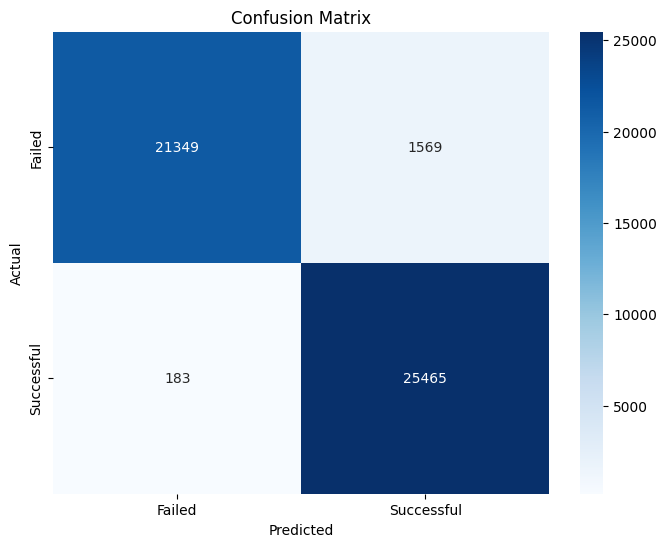

In [7]:


# Encode target variable: 'state' to binary (successful = 1, failed = 0)
df_filtered['target'] = df_filtered['state'].apply(lambda x: 1 if x == 'successful' else 0)

# Select features and target
features = ['backers_count', 'converted_pledged_amount', 'goal', 'percent_funded', 'pledged', 
            'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'category_name', 'subcategory', 'city']
target = 'target'




X = df_filtered[features]
y = df_filtered[target]

# Step 2: Categorical variables encoding
categorical_features = ['category_name', 'subcategory', 'city']
numeric_features = ['backers_count', 'converted_pledged_amount', 'goal', 'percent_funded', 'pledged', 
                    'static_usd_rate', 'usd_exchange_rate', 'usd_pledged']

# We create the preprocessing pipelines for both numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both into one preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Create the full pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Step 5: Train the model
pipeline.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = pipeline.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Step 8: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Failed", "Successful"], yticklabels=["Failed", "Successful"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## DataBase Creation ##

In [36]:
df_filtered_sql.columns

Index(['backers_count', 'converted_pledged_amount', 'goal', 'percent_funded',
       'pledged', 'static_usd_rate', 'usd_exchange_rate', 'usd_pledged',
       'category_name', 'subcategory', 'city', 'target'],
      dtype='object')

In [12]:
import sqlite3




# Connect to SQLite database (it will create a new file if it doesn't exist)
conn = sqlite3.connect('crowdfunding_data.db')

# Create a cursor object to interact with the database
cur = conn.cursor()

# Create table schema for the DataFrame (Based on df_filtered columns)
cur.execute('''
    CREATE TABLE IF NOT EXISTS campaign_data (
        backers_count INTEGER,
        converted_pledged_amount REAL,
        country_displayable_name TEXT,
        goal REAL,
        percent_funded REAL
        usd_pledged REAL,
        category_name TEXT,
        subcategory TEXT,
        city TEXT,
        static_usd_rate TEXT,
        target INTEGER,
        pledged INTEGER
    )
''')

# Insert data from the DataFrame into the SQLite table
df_filtered_sql.to_sql('campaign_data', conn, if_exists='replace', index=False)

# Commit changes and close the connection
conn.commit()

# Optionally, query to check if the data was inserted
saved_df = pd.read_sql('SELECT * FROM campaign_data LIMIT 5;', conn)
print(saved_df)

# Close the connection
conn.close()


NameError: name 'df_filtered_sql' is not defined

## Second Analogy ##

In [38]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_disliked', 'is_launched', 'is_liked', 'is_starrable',
       'launched_at', 'name', 'percent_funded', 'pledged',
       'prelaunch_activated', 'slug', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_exchange_rate',
       'usd_pledged', 'usd_type', 'month', 'category_name', 'subcategory',
       'city', 'initial_state', 'months_to_final_state', 'target'],
      dtype='object')

In [8]:
df_model_2 = df_filtered[['backers_count',
'converted_pledged_amount',
'country_displayable_name','goal','subcategory','usd_pledged',
'category_name',
'city',
'target','month']];

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:36:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 95.12%
Confusion Matrix:
[[21097  1821]
 [  549 25099]]


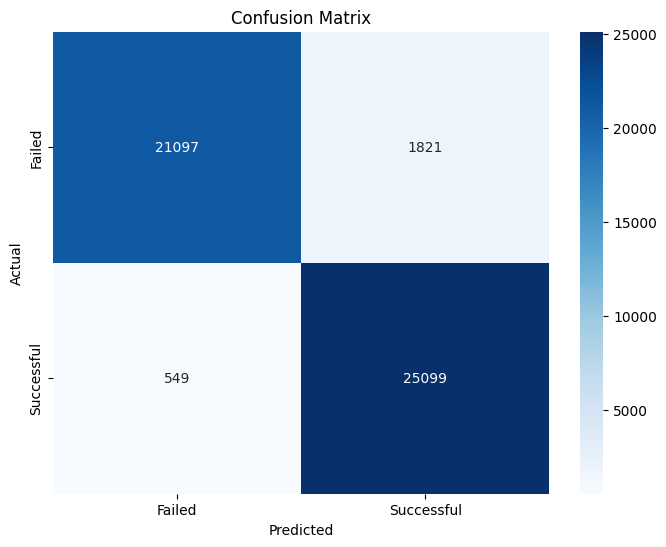

In [9]:
#df_model_2['target'] = df_model_2['state'].apply(lambda x: 1 if x == 'successful' else 0)

# Select features and target
features_2 = df_model_2.drop('target',axis=1)
target = 'target'


X = features_2
y = df_model_2[target]

# Step 2: Categorical variables encoding
categorical_features_2 = ['month','category_name','subcategory','country_displayable_name','city']
numeric_features_2 = ['backers_count', 'converted_pledged_amount', 'goal','usd_pledged']

# We create the preprocessing pipelines for both numeric and categorical features
numeric_transformer_2 = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer_2 = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both into one preprocessing pipeline
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_2, numeric_features_2),
        ('cat', categorical_transformer_2, categorical_features_2)
    ])

# Step 3: Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create the XGBoost model
xgb_m2 = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Create the full pipeline with preprocessing and model
pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('classifier', xgb_m2)
])

# Step 5: Train the model
pipeline_2.fit(X_train2, y_train2)

# Step 6: Make predictions
y_pred2 = pipeline_2.predict(X_test2)

# Step 7: Evaluate the model
accuracy2 = accuracy_score(y_test2, y_pred2)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)

print(f"Accuracy: {accuracy2 * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix2)

# Step 8: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=["Failed", "Successful"], yticklabels=["Failed", "Successful"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
import pickle


with open('xgb_m2.pkl', 'wb') as model_file:
    pickle.dump(xgb_m2, model_file)

In [45]:
df_model_2.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'goal', 'subcategory', 'usd_pledged', 'category_name', 'city', 'target',
       'month'],
      dtype='object')

In [13]:
import sqlite3
conn2 = sqlite3.connect('crowdfunding_dataModel.db')

# Create a cursor object to interact with the database
cur = conn2.cursor()

# Create table schema for the DataFrame (Based on df_filtered columns)
cur.execute('''
    CREATE TABLE IF NOT EXISTS campaign_data (
        backers_count INTEGER,
        converted_pledged_amount REAL,
        country_displayable_name TEXT,
        goal REAL,
        category_name TEXT,
        subcategory TEXT,
        city TEXT,
        month TEXT,
        target INTEGER,
        usd_pledged INTEGER
    )
''')

# Insert data from the DataFrame into the SQLite table
df_model_2.to_sql('campaign_data', conn2, if_exists='replace', index=False)

# Commit changes and close the connection
conn2.commit()

# Optionally, query to check if the data was inserted
saved_df = pd.read_sql('SELECT * FROM campaign_data LIMIT 5;', conn2)
print(saved_df)

# Close the connection
conn2.close()

   backers_count  converted_pledged_amount country_displayable_name     goal  \
0              2                      51.0        the United States  60000.0   
1            318                   27920.0        the United States   6000.0   
2             58                    5041.0                   Canada   5000.0   
3            108                    6614.0        the United States   1000.0   
4              1                       1.0        the United States  20000.0   

          subcategory   usd_pledged category_name             city  target  \
0  Interactive Design     51.000000        Design     New York, NY       0   
1      Product Design  27920.000000        Design      Wyoming, WY       1   
2             Fiction   5002.920719    Publishing  Halifax, Canada       1   
3             Fiction   6614.000000    Publishing    Covington, KY       1   
4  Interactive Design      1.000000        Design      Houston, TX       0   

        month  
0  2024-01-01  
1  2024-01-01  
2 